###`Import` all imperative libraies for `building` the `model`

In [ ]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
import zipfile
import cv2
import os
import random
from collections import Counter
from functools import reduce
from itertools import chain
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

##### Download keras #####
!pip install keras

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU
from tensorflow.keras.activations import tanh, relu, sigmoid, softmax, swish
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber
import keras.utils as image

#### For Functional API ####
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.layers import concatenate, Input,Dense, Conv2D,\
 LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D,\
  BatchNormalization, Dropout, LeakyReLU, ELU, PReLU

##### Plotting the confusion matrix #####
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

##### Remove all warnings #####
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


####`Access` the `Google Drive`

In [ ]:
##### To Access the Google Drive #####
def google_drive(parameter = None):
  try:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
  except Exception as e:
    print(e.with_traceback)
  else:
    print('\nGoogle Drive access is done.\n'.title())

google_drive()

Mounted at /content/drive

Google Drive Access Is Done.



####`Unzip` the folder of `Alzheimer` disease

In [ ]:
##### To Unzip the folder #####
def unzip_file(parameter = None):
  try:
    link_folder = '/content/drive/MyDrive/CNN Dataset/Alzheimer_Disease_Update.zip'
    zip_ref = zipfile.ZipFile(link_folder, 'r')
    zip_ref.extractall()
    zip_ref.close()
  except Exception as e:
    print(e.with_traceback)
  else:
    print('Upzip is done succesfully'.title())

##### Call the Unzip function #####
unzip_file()

Upzip Is Done Succesfully


####`Extract` the `train` folder with `Independent & Dependent` Features

In [ ]:
##### Extract the Images from the Folder #####
try:
  _DIRECTORY   = '/content/Combined Dataset/train'
  _CATEGORIES  = ['Mild Impairment', 'Moderate Impairment', 'No Impairment', 'Very Mild Impairment']
  train_data   = []

  for each_category_ in _CATEGORIES:
    folder_path_ = os.path.join(_DIRECTORY, each_category_)
    """
    /content/Alzheimer_s _Dataset/MildDemented
    /content/Alzheimer_s _Dataset/ModerateDemented
    /content/Alzheimer_s _Dataset/NonDemented
    /content/Alzheimer_s _Dataset/VeryMildDemented
    """
    for all_images_ in os.listdir(folder_path_):
      each_image_directory = os.path.join(folder_path_, all_images_)
      """
      /content/Alzheimer_s _Dataset/MildDemented/mildDem697.jpg
      /content/Alzheimer_s _Dataset/ModerateDemented/32 (2).jpg
      /content/Alzheimer_s _Dataset/NonDemented/nonDem1118.jpg
      /content/Alzheimer_s _Dataset/VeryMildDemented/verymildDem892.jpg
      """
      ##### Read the images and converted into NumPy format using CV #####
      image_array_    = cv2.imread(each_image_directory)
      ##### Converted the images into a fixed size #####
      reshaped_arary_ = cv2.resize(image_array_, (128, 128))
      ##### find the categories from that image folder #####
      target_class_   = _CATEGORIES.index(each_category_)
      """
      0 1 2 3
      """
      ##### Apend the reshaped array(features of each images) with the traget class #####
      train_data.append([reshaped_arary_, target_class_])
    
    print('{} folder is completed - Feature Extracted with Target Class'.format(each_category_).capitalize(),'\n')

except Exception as e:
  print(e.with_traceback)
else:
  print('Completed.\n'.title())

Mild impairment folder is completed - feature extracted with target class 

Moderate impairment folder is completed - feature extracted with target class 

No impairment folder is completed - feature extracted with target class 

Very mild impairment folder is completed - feature extracted with target class 

Completed.



####`Extract` the `validation` data with `Independent & Dependent` Features

In [ ]:
##### Extract the Images from the Folder #####
try:
  _DIRECTORY   = '/content/Combined Dataset/test'
  _CATEGORIES  = ['Mild Impairment', 'Moderate Impairment', 'No Impairment', 'Very Mild Impairment']
  validation_data   = []

  for each_category_ in _CATEGORIES:
    folder_path_ = os.path.join(_DIRECTORY, each_category_)
    """
    /content/Alzheimer_s _Dataset/MildDemented
    /content/Alzheimer_s _Dataset/ModerateDemented
    /content/Alzheimer_s _Dataset/NonDemented
    /content/Alzheimer_s _Dataset/VeryMildDemented
    """
    for all_images_ in os.listdir(folder_path_):
      each_image_directory = os.path.join(folder_path_, all_images_)
      """
      /content/Alzheimer_s _Dataset/MildDemented/mildDem697.jpg
      /content/Alzheimer_s _Dataset/ModerateDemented/32 (2).jpg
      /content/Alzheimer_s _Dataset/NonDemented/nonDem1118.jpg
      /content/Alzheimer_s _Dataset/VeryMildDemented/verymildDem892.jpg
      """
      ##### Read the images and converted into NumPy format using CV #####
      image_array_    = cv2.imread(each_image_directory)
      ##### Converted the images into a fixed size #####
      reshaped_arary_ = cv2.resize(image_array_, (128, 128))
      ##### find the categories from that image folder #####
      target_class_   = _CATEGORIES.index(each_category_)
      """
      0 1 2 3
      """
      ##### Apend the reshaped array(features of each images) with the traget class #####
      validation_data.append([reshaped_arary_, target_class_])
    
    print('{} folder is completed - Feature Extracted with Target Class'.format(each_category_).capitalize(),'\n')

except Exception as e:
  print(e.with_traceback)
else:
  print('Completed.\n'.title())

Mild impairment folder is completed - feature extracted with target class 

Moderate impairment folder is completed - feature extracted with target class 

No impairment folder is completed - feature extracted with target class 

Very mild impairment folder is completed - feature extracted with target class 

Completed.



####Check the `length` of `Train & Validation` dataset

In [ ]:
class listEmptyException(Exception):
  def __init__(self, message):
    return message

def check_shape(train = None, validation = None):
  if (len(train) != 0 and len(validation) !=0):
    return len(train), len(validation)
  else:
    raise Exception('List is empty.'.capitalize())

try:
  train_shape, test_shape = check_shape(train = train_data, validation = validation_data)
except listEmptyException as e:
  print(e)
else:
  print('The length of train dataset is = {}'.format(train_shape))
  print('The length of validation dataset is = {}'.format(test_shape))

The length of train dataset is = 10240
The length of validation dataset is = 1279


####`Extract` the `Independent & Dependent` Features with respect to `train & validation`

In [ ]:
def extract_independent_dependent_features(data = None):
  #### Initialization X <- Independent and y <- Dependent ####
  X, y = [], []

  for (extracted_feature, target_class) in data:
    X.append(extracted_feature)
    y.append(target_class)
  
  return X, y

#### Call the 'extract_independent_dependent_features' ####
try:
  #### Shuffle the stored_data_ due to prevent the biasness ####
  random.shuffle(train_data)
  random.shuffle(validation_data)
  #### Call the function ####
  X_train, y_train = extract_independent_dependent_features(train_data)
  X_val, y_val     = extract_independent_dependent_features(validation_data)
except Exception as e:
  print(e.with_traceback)
else:
  print('Extraction is completed with independent and dependent'.title())

Extraction Is Completed With Independent And Dependent


####Convert the `Independent & Dependent` Features into `NumPy` Foramt

In [ ]:
#### Convered the independent and dependent features into NumPy format ####
def converted_NumPy(independent = None, dependent = None):
  return np.array(independent), np.array(dependent)

#### Call 'converted_NumPy' function with X and y ####
try:
  X_train, y_train = converted_NumPy(X_train, y_train)
  X_val, y_val = converted_NumPy(X_val, y_val)
except Exception as e:
  print(e.with_traceback)
else:
  print('Converted into NumPy format successfully.'.title(),'\n')
  print('The shape of train dataset is = {}'.format(X_train.shape),'\n')
  print('The shape of validation dataset is = {}'.format(X_val.shape))

Converted Into Numpy Format Successfully. 

The shape of train dataset is = (10240, 128, 128, 3) 

The shape of validation dataset is = (1279, 128, 128, 3)


####Plot the `countplot` of the `Target Class`

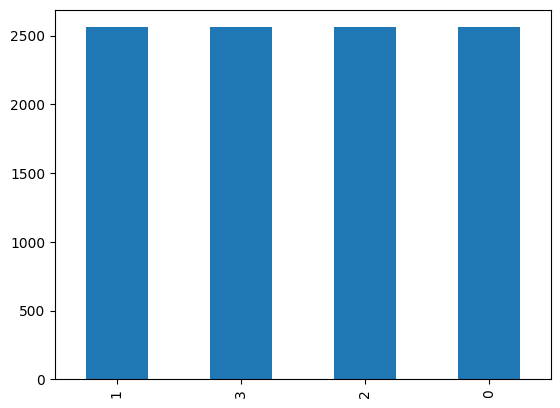

In [ ]:
#### Define a function that returns the value counts ####
def countplot(target_class):
  if len(target_class) != 0:
    return pd.DataFrame(target_class)[0].value_counts()
  else:
    raise Exception('List is empty'.title())

#### Call this function from this current directory ####
try:
  dataframe = countplot(y_train)
except listEmptyException as e:
  print(e)
else:
  dataframe.plot(kind = 'bar')
  plt.show()

####Plot the `Images`

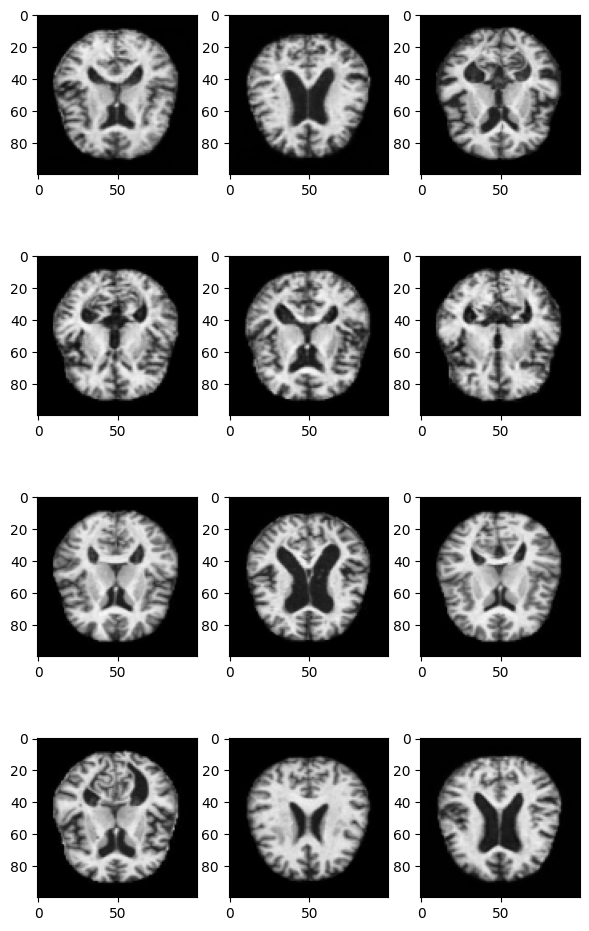

In [ ]:
#### Define a class that throws the user defined exception ####
def plotException(Exception):
  def __init__(self, message):
    return "plot exception".title()

#### Plot 3 images from each folders ####
_DIRECTORY   = '/content/Combined Dataset/train'
_CATEGORIES  = ['Mild Impairment', 'Moderate Impairment', 'No Impairment', 'Very Mild Impairment']
plot_dt_dic = {}

for each_category_ in _CATEGORIES:
  folder_path_ = os.path.join(_DIRECTORY, each_category_)
  count_, list_ = 0, []
  for all_images_ in os.listdir(folder_path_):
    if count_ < 3:
      each_image_directory = os.path.join(folder_path_, all_images_)
      #### In order to make the computation cost minimised the image size is = (100, 100) ####
      list_.append(cv2.resize(cv2.imread(each_image_directory), (100, 100)))
      count_ = count_ + 1
    else:
      break
  plot_dt_dic[each_category_] = list_

#### Plot the iamges ####
try:
  fig, ax = plt.subplots(4, 3, figsize = (7, 12))
  ax[0, 0].imshow(plot_dt_dic['Mild Impairment'][0])
  ax[0, 1].imshow(plot_dt_dic['Mild Impairment'][1])
  ax[0, 2].imshow(plot_dt_dic['Mild Impairment'][2])

  ax[1, 0].imshow(plot_dt_dic['Moderate Impairment'][0])
  ax[1, 1].imshow(plot_dt_dic['Moderate Impairment'][1])
  ax[1, 2].imshow(plot_dt_dic['Moderate Impairment'][2])

  ax[2, 0].imshow(plot_dt_dic['No Impairment'][0])
  ax[2, 1].imshow(plot_dt_dic['No Impairment'][1])
  ax[2, 2].imshow(plot_dt_dic['No Impairment'][2])

  ax[3, 0].imshow(plot_dt_dic['Very Mild Impairment'][0])
  ax[3, 1].imshow(plot_dt_dic['Very Mild Impairment'][1])
  ax[3, 2].imshow(plot_dt_dic['Very Mild Impairment'][2])
  plt.show()

except plotException as e:
  print(e)

###Do the `Normalization` with respect to `Independent` Features

In [ ]:
#### Normalized the independent features ####
def Normalized(independent):
  if len(independent) == 0:
     raise Exception('List is empty.'.title())
  else:
    return (independent/255)

#### Call the Normalized function ####
try:
  X_train_normalised = Normalized(X_train)
  X_validation_normalised = Normalized(X_val)
except listEmptyException as e:
  print("The exception is {}".format(e))
except Exception as e:
  print(e)
else:
  print('Normalization is done.\n'.title())

Normalization Is Done.



####Split the dataset into `train & test` with respect to train dataset

In [ ]:
#### Define the function that is responsible to train and test ####
def train_test_split(train_dataset = None, y_train = None):
  from sklearn.model_selection import train_test_split
  if len(train_dataset)  == 0:
    raise Exception('List is empty'.title(),'\n')
  else:
    X_train, X_test, y_train, y_test = train_test_split(train_dataset,\
                              y_train,\
                              test_size = 0.25,\
                              random_state = 42)
    return X_train, X_test, y_train, y_test


#### Call the function with this current directory ####                                                             
try:
  X_train, X_test, y_train, y_test = train_test_split(train_dataset = X_train_normalised, y_train = y_train)
except listEmptyException as e:
  print("The exception is {}".format(e))
except Exception as e:
  print("The exception is {}".format(e))
else:
  print('The shape of X_train is = {} '.format(X_train.shape),'\n'.capitalize())
  print('The shape of X_test  is = {} '.format(X_test.shape),'\n'.capitalize())
  print('The shape of y_train is = {} '.format(y_train.shape),'\n'.capitalize())
  print('The shape of y_test  is = {} '.format(y_test.shape),'\n'.capitalize())

The shape of X_train is = (7680, 128, 128, 3)  

The shape of X_test  is = (2560, 128, 128, 3)  

The shape of y_train is = (7680,)  

The shape of y_test  is = (2560,)  



####Find `Class Weight` with respect to class

In [ ]:
##### Call the class_weight #####
def class_weight(y_train = None):
  if len(y_train) == 0:
    raise Exception('List is empty'.title())
  else:
    # Calculate weights using sklearn
    from sklearn.utils import class_weight
    sklearn_weights =  class_weight.compute_class_weight(
          class_weight='balanced',
            classes=np.unique(y_train), 
            y = y_train)

    print("Weights is :", sklearn_weights,'\n\n')

    # Transform array to dictionary
    sklearn_weights = dict(enumerate(sklearn_weights))
    print("Weights is :", sklearn_weights)

  return sklearn_weights

try:
  sklearn_weights = class_weight(y_train = y_train)
except listEmptyException as e:
  print('The exception is {}'.format(e))

Weights is : [1.00840336 0.9825998  0.99895942 1.01052632] 


Weights is : {0: 1.0084033613445378, 1: 0.9825997952917093, 2: 0.9989594172736732, 3: 1.0105263157894737}


#Define `Vanilla CNN architecture` using `Functional` API for training the model

In [ ]:
#### Define the input shape ####
input_shape = (128, 128, 3)
input_shape = Input(shape = input_shape)

#### Define the left hidden layer ####
left_hidden1 = Conv2D(filters = 64,\
                            kernel_size = (3, 3),\
                            strides = (2, 2),\
                            padding = 'same',\
                            activation = 'relu',\
                            kernel_initializer = 'he_normal')(input_shape)


#### Define the second left hidden layer ####
left_hidden2 = Conv2D(filters = 32,\
                            kernel_size = (3, 3),\
                            strides = (2, 2),\
                            padding = 'same',\
                            activation = 'relu',\
                            kernel_initializer = 'he_normal')(left_hidden1)

#### Use the Dropout rate with 0.4 ####
left_hidden2 = Dropout(rate = 0.4)(left_hidden2)

#### Do the Flatten operation ####
left_flatten = Flatten()(left_hidden2)

#### For the right Fuctional API ####
right_hidden1 = Conv2D(filters = 256,\
                            kernel_size = (3, 3),\
                            strides = (2, 2),\
                            padding = 'valid',\
                            activation = 'relu',\
                            kernel_initializer = 'he_normal')(input_shape)

####Define the right second hidden layer of Conv2d###
right_hidden2 = Conv2D(filters = 128,\
                            kernel_size = (3, 3),\
                            strides = (2, 2),\
                            padding = 'valid',\
                            activation = 'relu',\
                            kernel_initializer = 'he_normal')(right_hidden1)

#### Do the Flatten operation ####
right_flatten = Flatten()(right_hidden2)

#### Do the concatenation ####
combined = concatenate([left_flatten, right_flatten])

#### Use the Dropout rate = 0.3 ####
combined = Dropout(rate = 0.3)(combined)

#### Do the Fully conneted layer ####
first_hidden1 = Dense(units = 256,\
                      activation = 'relu',\
                      kernel_initializer = 'he_normal',\
                      kernel_regularizer = L2(l2 = 0.01))(combined)

#### Use the Dropout layer with ratio 0.5 ####
first_hidden1 = Dropout(rate = 0.5)(first_hidden1)

#### Use the Fully connected layer ####
second_hidden2 = Dense(units = 128,\
                       activation = 'relu',\
                       kernel_initializer = 'he_normal',\
                       kernel_regularizer = L2(l2 = 0.001))(first_hidden1)


second_hidden2 = concatenate([second_hidden2, combined])


#### Use the Dropout ratio 0.5 ####
second_hidden2 = Dropout(rate = 0.6)(second_hidden2)

#### Use the thrid hidden layer ####
third_hidden = Dense(units = 64,\
                       activation = 'relu',\
                       kernel_initializer = 'he_normal',\
                       kernel_regularizer = L2(l2 = 0.005))(second_hidden2)

#### Use the dropout ratio 0.5 ####
second_hidden2 = Dropout(rate = 0.5)(third_hidden)

#### This is responsible for the output layer ####
output_layer = Dense(units = 4,\
                     activation = 'softmax')(second_hidden2)

#### Connect the inputs and outputs in Model function for the Functional API ####
model = Model(inputs = input_shape,\
              outputs = output_layer)

#### This is responsible for the compile the model ####
model.compile(optimizer = Adam(learning_rate = 0.0005),\
              loss = SparseCategoricalCrossentropy(),\
              metrics = ['accuracy'])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 64, 64, 64)   1792        ['input_3[0][0]']                
                                                                                                  
 conv2d_9 (Conv2D)              (None, 32, 32, 32)   18464       ['conv2d_8[0][0]']               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 63, 63, 256)  7168        ['input_3[0][0]']          

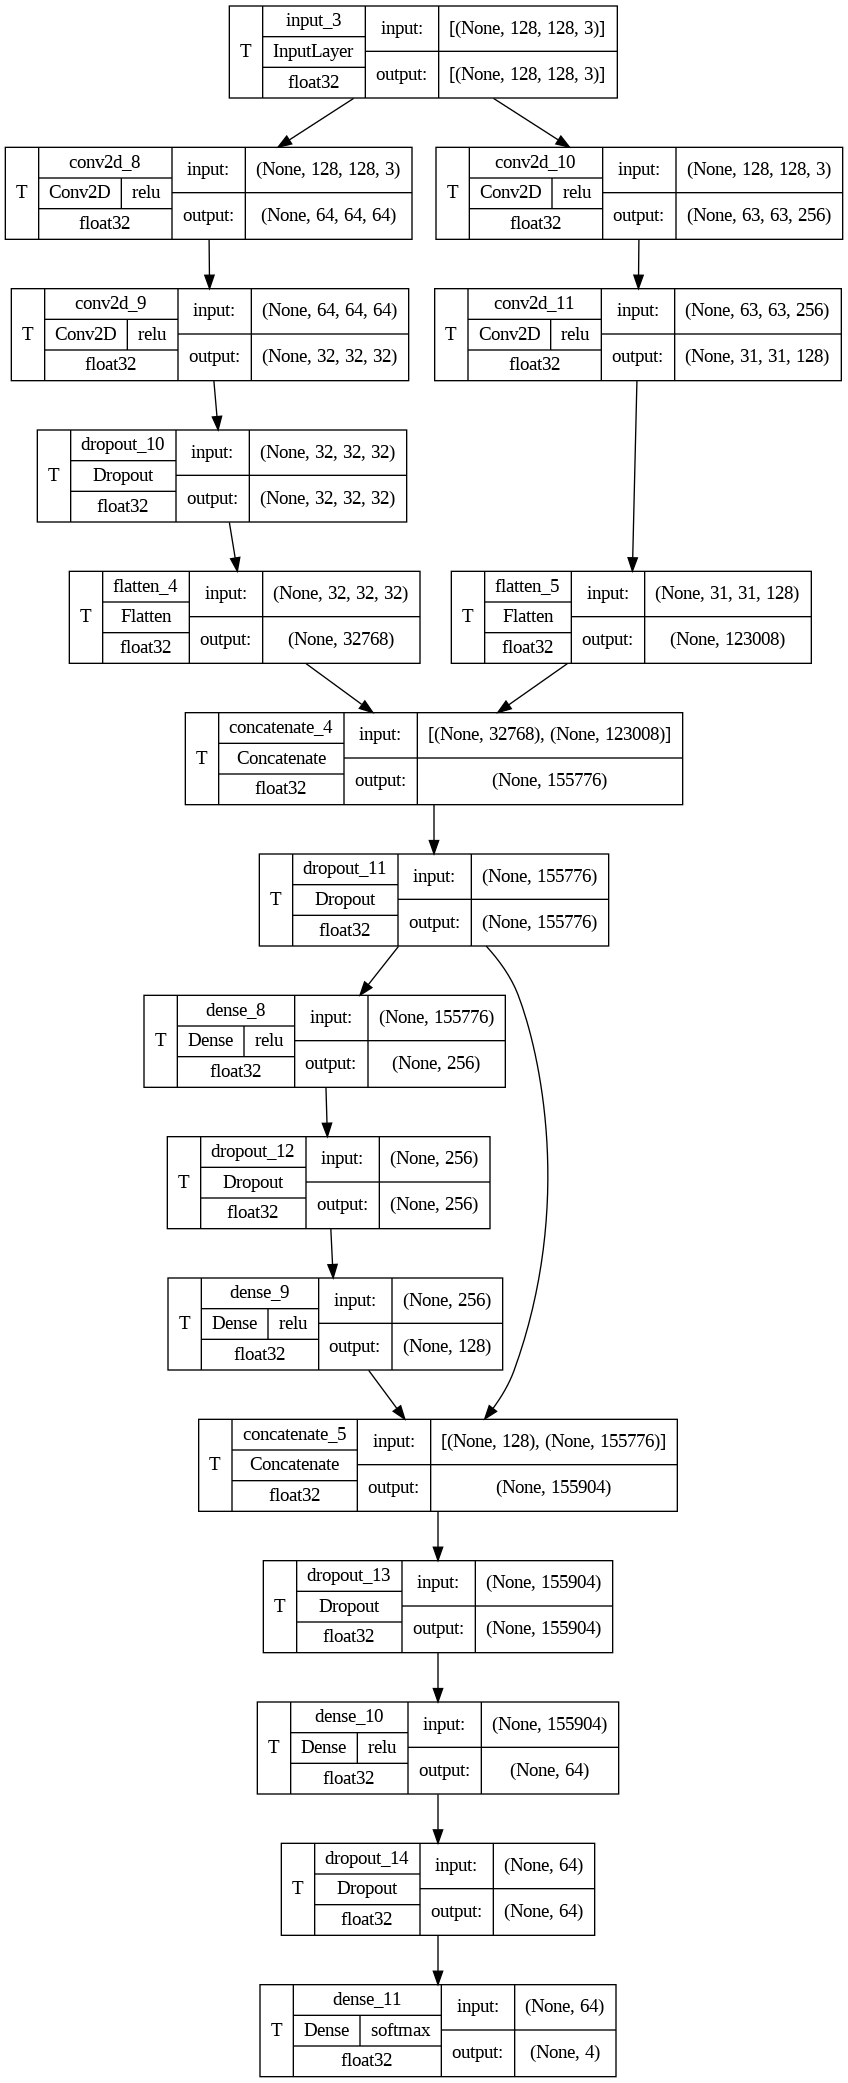

In [ ]:
plot_model(model = model,\
           show_shapes = True,\
           show_dtype = True,\
           show_layer_names = True,\
           show_layer_activations = True,\
           show_trainable = True)

In [ ]:
history = model.fit(x = X_train,\
                    y = y_train,\
                    epochs = 100,\
                    batch_size = 128,\
                    validation_data = (X_test, y_test),\
                    verbose = 1)

Epoch 1/100
60/60 [==============================] - 18s 228ms/step - loss: 2.5565 - accuracy: 0.3417 - val_loss: 1.4750 - val_accuracy: 0.5043
Epoch 2/100
60/60 [==============================] - 13s 213ms/step - loss: 1.3836 - accuracy: 0.4639 - val_loss: 1.1232 - val_accuracy: 0.4875
Epoch 3/100
60/60 [==============================] - 13s 221ms/step - loss: 1.2308 - accuracy: 0.4966 - val_loss: 0.9663 - val_accuracy: 0.6832
Epoch 4/100
60/60 [==============================] - 13s 213ms/step - loss: 1.1383 - accuracy: 0.5100 - val_loss: 0.8988 - val_accuracy: 0.6895
Epoch 5/100
60/60 [==============================] - 13s 211ms/step - loss: 1.0994 - accuracy: 0.5147 - val_loss: 0.8706 - val_accuracy: 0.7281
Epoch 6/100
60/60 [==============================] - 13s 210ms/step - loss: 1.0497 - accuracy: 0.5363 - val_loss: 0.7897 - val_accuracy: 0.6980
Epoch 7/100
60/60 [==============================] - 13s 210ms/step - loss: 1.0186 - accuracy: 0.5296 - val_loss: 0.7840 - val_accuracy:

In [ ]:
print('The training performace of this model is given below.\n\n'.title())

predicted_ = model.predict(X_train)
predicted_ = np.argmax(predicted_, axis = 1)

print('The accuracy of this Neural Network is = {} '.format(accuracy_score(predicted_, y_train),'\n'))
print('The precision of this Neural Network is  = {} '.format(precision_score(predicted_, y_train, average = 'macro'),'\n'))
print('The reacll of this Neural Network is     = {} '.format(recall_score(predicted_, y_train, average = 'macro'),'\n'))
print('The f1_score of this Neural Network is   = {} '.format(f1_score(predicted_, y_train, average = 'macro'),'\n\n'))

print('The testing performace of this model is given below.\n\n'.title())

predicted_ = model.predict(X_test)
predicted_ = np.argmax(predicted_, axis = 1)

print('\nThe accuracy of this Neural Network is = {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision of this Neural Network is  = {} '.format(precision_score(predicted_, y_test, average = 'macro'),'\n'))
print('The reacll of this Neural Network is     = {} '.format(recall_score(predicted_, y_test, average = 'macro'),'\n'))
print('The f1_score of this Neural Network is   = {} '.format(f1_score(predicted_, y_test, average = 'macro'),'\n\n'))

The Training Performace Of This Model Is Given Below.


240/240 [==============================] - 3s 10ms/step
The accuracy of this Neural Network is = 0.9959635416666667 
The precision of this Neural Network is  = 0.9959210526315789 
The reacll of this Neural Network is     = 0.9960216274593221 
The f1_score of this Neural Network is   = 0.9959405841610958 
The Testing Performace Of This Model Is Given Below.


80/80 [==============================] - 1s 10ms/step

The accuracy of this Neural Network is = 0.969921875 
The precision of this Neural Network is  = 0.9704967568876315 
The reacll of this Neural Network is     = 0.970450256922307 
The f1_score of this Neural Network is   = 0.9703708405695449 


In [ ]:
print('The classification report of this testing model is given below.\n'.capitalize())
print(classification_report(predicted_, y_test))

The classification report of this testing model is given below.

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       658
           1       1.00      1.00      1.00       606
           2       0.96      0.94      0.95       656
           3       0.93      0.96      0.95       640

    accuracy                           0.97      2560
   macro avg       0.97      0.97      0.97      2560
weighted avg       0.97      0.97      0.97      2560



####Plot the `Confusion` Matrix

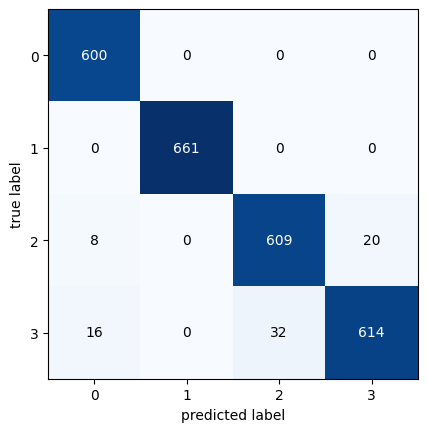

In [ ]:
#### Plot the confusion matrix ####
confusion_mat = confusion_matrix(predicted_, y_test)

fig, ax = plot_confusion_matrix(conf_mat = confusion_mat)

plt.show()

####Plot `train and test` loss and `train and test` accuracy

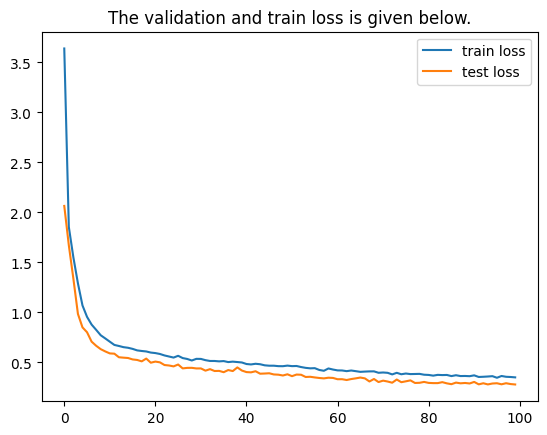

************************************************************************************************************************ 



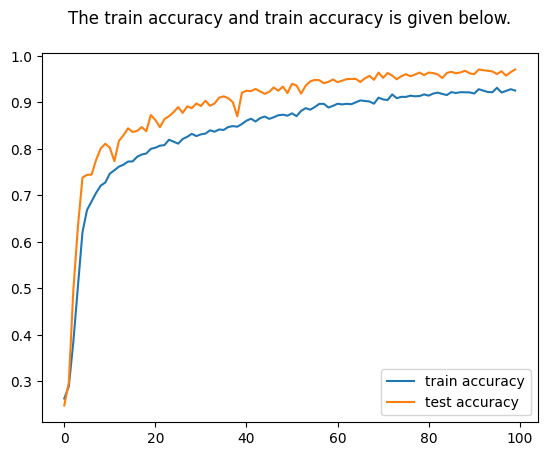

In [ ]:
##### Plot the validation loss and train loss #####
plt.title('The validation and train loss is given below.')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

print('*'*120,'\n')

plt.title('The train accuracy and train accuracy is given below.\n')
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

####Check the performance for `Validation` dataset

In [ ]:
##### Show the performance of this model #####
predicted = model.predict(X_validation_normalised)
predicted = np.argmax(predicted, axis = 1)

print('\nThe accuracy of this Neural Network is  = {} '.format(accuracy_score(predicted,\
                                                                              y_val),'\n'))
print('The precision of this Neural Network is = {} '.format(precision_score(predicted, y_val,\
                                                                             average = 'macro'),'\n'))
print('The reacll of this Neural Network is    = {} '.format(recall_score(predicted, y_val,\
                                                                          average = 'macro'),'\n'))
print('The f1_score of this Neural Network is  = {} '.format(f1_score(predicted, y_val,\
                                                                      average = 'macro')))

40/40 [==============================] - 0s 9ms/step

The accuracy of this Neural Network is  = 0.9233776387802971 
The precision of this Neural Network is = 0.9298701865522746 
The reacll of this Neural Network is    = 0.9528638028638029 
The f1_score of this Neural Network is  = 0.9399535076170082 


####Save the model for the `web app` application

In [ ]:
try:
  model.save('model.h5')
except Exception as e:
  print('The exception is {}'.format(e).title())
else:
  print('The Model has been saved successfully'.title())

The Model Has Been Saved Successfully


###Do the `training` with respect to `Vanilla` architecture - plain architecture

In [ ]:
#### Define a function that is responsible for training ####
def train_model(train_data = None, optimizer = None):
  if len(train_data) == 0:
    raise listEmptyException('List is empty'.title())
  else:
    #### Create a sequential model ####
    model = Sequential()

    #### Create first Convolutional Layer with 32 kernels ####
    model.add(Conv2D(filters = 64, kernel_size = (3, 3),\
                    strides = (1, 1),\
                    padding = 'valid',\
                    activation = 'relu',\
                    kernel_initializer = 'he_normal',\
                    input_shape = train_data.shape[1:]))

    #### Use the MaxPooling Layer with Strides = 2, shape = (2, 2) ####
    model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))

    #### Create second Convolutional Layer with 32 kernels ####
    model.add(Conv2D(filters = 32,\
                    kernel_size = (3, 3),\
                    strides = (1, 1),\
                    padding = 'valid',\
                    activation = 'relu' ,\
                    kernel_initializer = 'he_normal'))

    #### Use the MaxPooling Layer with Strides = 2, shape = (2, 2) ####
    model.add(MaxPool2D(pool_size = (2, 2),\
                        strides = (2, 2),\
                        padding = 'valid'))


    #### Create third and last Convolutional Layer with 16 filters ####
    model.add(Conv2D(filters = 16,\
                    kernel_size = (3, 3),\
                    strides = (1, 1),\
                    padding = 'valid',\
                    activation = 'relu',\
                    kernel_initializer = 'he_normal'))

    #### Use the MaxPooling Layer with shape (2, 2) and Strides = (2, 2) ####
    model.add(MaxPool2D(pool_size = (2, 2),\
                        strides = (2, 2),\
                        padding = 'valid'))

    #### Flatten the Convolutional Layer ####
    model.add(Flatten())

    #### Create first hidden layer with 256 neurons with L2 regularization ####
    model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal'))

    #### Use the Dropout Layer with the p value = 0.5 ####
    model.add(Dropout(0.6))

    #### Create second hidden layer with 128 neurons ####
    model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2()))

    #### Use the Dropout Layer with the p value = 0.5 ####
    model.add(Dropout(0.6))

    #### Create an output layer with softmax ####
    model.add(Dense(units = 4, activation = 'softmax'))

    #### Compile the model ####
    model.compile(optimizer = optimizer, loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])
  
  return model 

###Plot the summary of this model

In [ ]:
try:
  model = train_model(train_data = X_train_normalised, optimizer = 'Adam')
except listEmptyException as e:
  print("The exception of this model is {}".format(e))
except Exception as e:
  print(e.with_traceback)
else:
  model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0

####Plot the `model` architecture

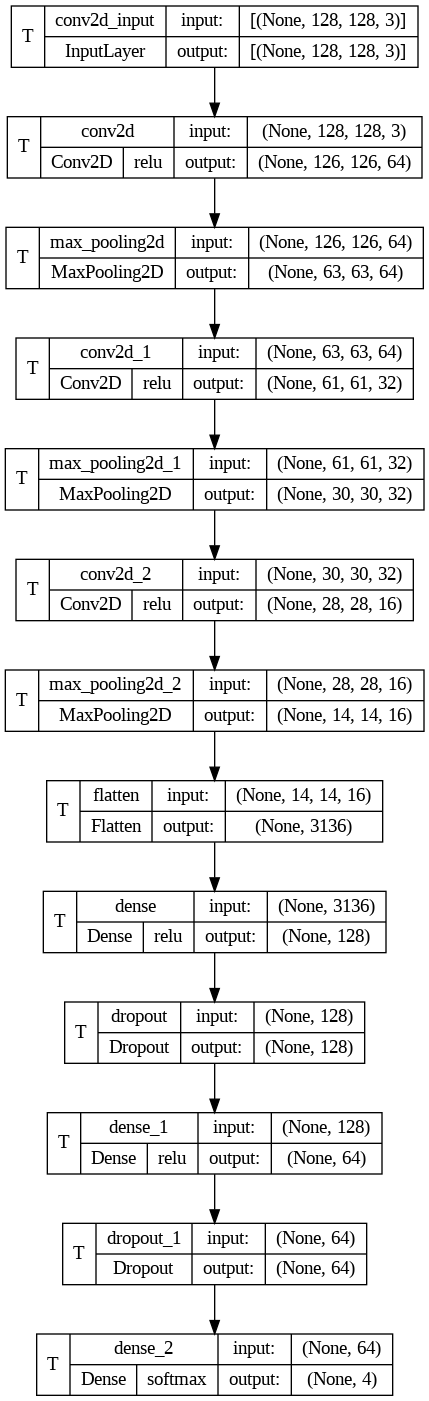

In [ ]:
plot_model(model = model,\
           show_shapes = True,\
           show_layer_names = True,\
           show_layer_activations = True,\
           show_trainable = True)

####Do the `train` with respect to train and test

In [ ]:
def do_train(x = None, y = None, batch_size = None, epochs = None):
  #### Fit the model and check the performance with batch size = 64 ####
  history_ = model.fit(x = x,\
                       y = y,\
                       batch_size = batch_size,\
                       epochs = epochs,\
                       validation_data = (X_test, y_test),\
                       verbose = 1,\
                       class_weight = sklearn_weights)
  return history_
try:
  history = do_train(x = X_train, y = y_train, batch_size = 128, epochs = 100)
except Exception as e:
  print('The exception is {}'.format(e))

Epoch 1/100
60/60 [==============================] - 14s 92ms/step - loss: 2.3402 - accuracy: 0.3393 - val_loss: 1.8532 - val_accuracy: 0.6242
Epoch 2/100
60/60 [==============================] - 4s 72ms/step - loss: 1.5192 - accuracy: 0.5572 - val_loss: 1.1152 - val_accuracy: 0.6969
Epoch 3/100
60/60 [==============================] - 4s 71ms/step - loss: 1.1091 - accuracy: 0.6370 - val_loss: 0.8540 - val_accuracy: 0.7242
Epoch 4/100
60/60 [==============================] - 4s 71ms/step - loss: 0.8815 - accuracy: 0.6708 - val_loss: 0.6952 - val_accuracy: 0.7660
Epoch 5/100
60/60 [==============================] - 4s 72ms/step - loss: 0.7693 - accuracy: 0.6960 - val_loss: 0.6103 - val_accuracy: 0.7801
Epoch 6/100
60/60 [==============================] - 4s 71ms/step - loss: 0.6996 - accuracy: 0.7117 - val_loss: 0.5510 - val_accuracy: 0.8016
Epoch 7/100
60/60 [==============================] - 4s 72ms/step - loss: 0.6499 - accuracy: 0.7245 - val_loss: 0.5154 - val_accuracy: 0.8008
Epoch

###Show the performance of this model

In [ ]:
print('The training performace of this model is given below.\n\n'.title())

predicted_ = model.predict(X_train)
predicted_ = np.argmax(predicted_, axis = 1)

print('The accuracy of this Neural Network is = {} '.format(accuracy_score(predicted_, y_train),'\n'))
print('The precision of this Neural Network is  = {} '.format(precision_score(predicted_, y_train, average = 'macro'),'\n'))
print('The reacll of this Neural Network is     = {} '.format(recall_score(predicted_, y_train, average = 'macro'),'\n'))
print('The f1_score of this Neural Network is   = {} '.format(f1_score(predicted_, y_train, average = 'macro'),'\n\n'))

print('The testing performace of this model is given below.\n\n'.title())

predicted_ = model.predict(X_test)
predicted_ = np.argmax(predicted_, axis = 1)

print('\nThe accuracy of this Neural Network is = {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision of this Neural Network is  = {} '.format(precision_score(predicted_, y_test, average = 'macro'),'\n'))
print('The reacll of this Neural Network is     = {} '.format(recall_score(predicted_, y_test, average = 'macro'),'\n'))
print('The f1_score of this Neural Network is   = {} '.format(f1_score(predicted_, y_test, average = 'macro'),'\n\n'))

The Training Performace Of This Model Is Given Below.


240/240 [==============================] - 2s 6ms/step
The accuracy of this Neural Network is = 0.99375 
The precision of this Neural Network is  = 0.9937613323337635 
The reacll of this Neural Network is     = 0.9938361030297886 
The f1_score of this Neural Network is   = 0.9937478357696101 
The Testing Performace Of This Model Is Given Below.


80/80 [==============================] - 0s 6ms/step

The accuracy of this Neural Network is = 0.953515625 
The precision of this Neural Network is  = 0.9537187162318618 
The reacll of this Neural Network is     = 0.9555001586519056 
The f1_score of this Neural Network is   = 0.9542903689395154 


####Show the `Classification` report to this model

In [ ]:
print('The classification report of this testing model is given below.\n'.capitalize())
print(classification_report(predicted_, y_test))

The classification report of this testing model is given below.

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       600
           1       1.00      1.00      1.00       632
           2       0.93      0.94      0.94       637
           3       0.94      0.89      0.91       691

    accuracy                           0.95      2560
   macro avg       0.95      0.96      0.95      2560
weighted avg       0.95      0.95      0.95      2560



####Plot the `Confusion` Matrix

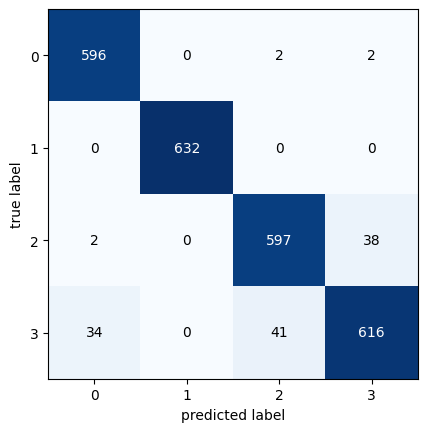

In [ ]:
#### Plot the confusion matrix ####
confusion_mat = confusion_matrix(predicted_, y_test)

fig, ax = plot_confusion_matrix(conf_mat = confusion_mat)

plt.show()

####Plot `train and test` loss and `train and test` accuracy

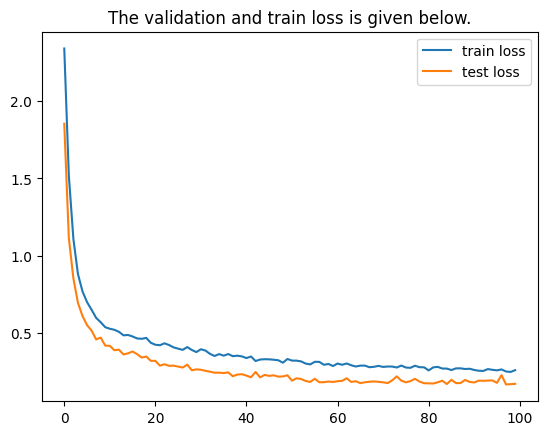

************************************************************************************************************************ 



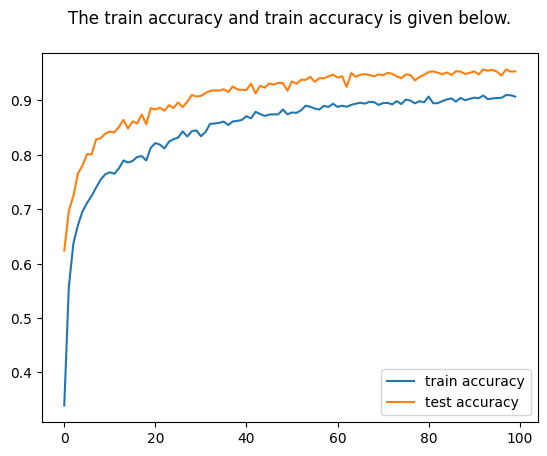

In [ ]:
##### Plot the validation loss and train loss #####
plt.title('The validation and train loss is given below.')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

print('*'*120,'\n')

plt.title('The train accuracy and train accuracy is given below.\n')
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

#Build the Complex and Deep Neural Network for this dataset

In [ ]:
#### Define the input shape ####
input_shape = (128, 128, 3)
input_shape = Input(shape = input_shape)

#### Define the left hidden layer ####
left_hidden1 = Conv2D(filters = 64,\
                            kernel_size = (3, 3),\
                            strides = (2, 2),\
                            padding = 'same',\
                            activation = 'relu',\
                            kernel_initializer = 'he_normal')(input_shape)


#### Define the second left hidden layer ####
left_hidden2 = Conv2D(filters = 32,\
                            kernel_size = (3, 3),\
                            strides = (2, 2),\
                            padding = 'same',\
                            activation = 'relu',\
                            kernel_initializer = 'he_normal')(left_hidden1)

#### Use the Dropout rate with 0.4 ####
left_hidden2 = Dropout(rate = 0.4)(left_hidden2)

#### Do the Flatten operation ####
left_flatten = Flatten()(left_hidden2)

#### For the right Fuctional API ####
right_hidden1 = Conv2D(filters = 256,\
                            kernel_size = (3, 3),\
                            strides = (2, 2),\
                            padding = 'valid',\
                            activation = 'relu',\
                            kernel_initializer = 'he_normal')(input_shape)

####Define the right second hidden layer of Conv2d###
right_hidden2 = Conv2D(filters = 128,\
                            kernel_size = (3, 3),\
                            strides = (2, 2),\
                            padding = 'valid',\
                            activation = 'relu',\
                            kernel_initializer = 'he_normal')(right_hidden1)

#### Do the Flatten operation ####
right_flatten = Flatten()(right_hidden2)

##############################LSTM #####################################

right_flatten_LSTM = Reshape((-1, 128))(right_flatten)
right_flatten_LSTM = LSTM(units = 32,\
                     activation = 'tanh')(right_flatten_LSTM)

#### Do the concatenation ####
combined = concatenate([left_flatten, right_flatten_LSTM])

#### Use the Dropout rate = 0.3 ####
combined = Dropout(rate = 0.3)(combined)

#### Do the Fully conneted layer ####
first_hidden1 = Dense(units = 256,\
                      activation = 'relu',\
                      kernel_initializer = 'he_normal',\
                      kernel_regularizer = L2(l2 = 0.01))(combined)

#### Use the Dropout layer with ratio 0.5 ####
first_hidden1 = Dropout(rate = 0.5)(first_hidden1)

#### Use the Fully connected layer ####
second_hidden2 = Dense(units = 128,\
                       activation = 'relu',\
                       kernel_initializer = 'he_normal',\
                       kernel_regularizer = L2(l2 = 0.001))(first_hidden1)


second_hidden2 = concatenate([second_hidden2, combined])


#### Use the Dropout ratio 0.5 ####
second_hidden2 = Dropout(rate = 0.6)(second_hidden2)

#### Use the thrid hidden layer ####
third_hidden = Dense(units = 64,\
                       activation = 'relu',\
                       kernel_initializer = 'he_normal',\
                       kernel_regularizer = L2(l2 = 0.005))(second_hidden2)

#### Use the dropout ratio 0.5 ####
second_hidden2 = Dropout(rate = 0.5)(third_hidden)

#### This is responsible for the output layer ####
output_layer_LSTM = Dense(units = 4,\
                     activation = 'softmax',\
                     name = 'classification_LSTM')(second_hidden2)

###################################################################

########################### Vanilla Functional API ################

#### Do the concatenation ####
combined = concatenate([left_flatten, right_flatten])

#### Use the Dropout rate = 0.3 ####
combined = Dropout(rate = 0.3)(combined)

#### Do the Fully conneted layer ####
first_hidden1 = Dense(units = 256,\
                      activation = 'relu',\
                      kernel_initializer = 'he_normal',\
                      kernel_regularizer = L2(l2 = 0.01))(combined)

#### Use the Dropout layer with ratio 0.5 ####
first_hidden1 = Dropout(rate = 0.5)(first_hidden1)

#### Use the Fully connected layer ####
second_hidden2 = Dense(units = 128,\
                       activation = 'relu',\
                       kernel_initializer = 'he_normal',\
                       kernel_regularizer = L2(l2 = 0.001))(first_hidden1)


second_hidden2 = concatenate([second_hidden2, combined])


#### Use the Dropout ratio 0.5 ####
second_hidden2 = Dropout(rate = 0.6)(second_hidden2)

#### Use the thrid hidden layer ####
third_hidden = Dense(units = 64,\
                       activation = 'relu',\
                       kernel_initializer = 'he_normal',\
                       kernel_regularizer = L2(l2 = 0.005))(second_hidden2)

#### Use the dropout ratio 0.5 ####
second_hidden2 = Dropout(rate = 0.5)(third_hidden)

#### This is responsible for the output layer ####
output_layer2_FAPI = Dense(units = 4,\
                     activation = 'softmax',\
                     name = 'classification_FAPI')(second_hidden2)

##################################################################


############################## Normal ############################

#### Do the concatenation ####
combined = concatenate([left_flatten, right_flatten])

#### Use the Dropout rate = 0.3 ####
combined = Dropout(rate = 0.3)(combined)

#### Do the Fully conneted layer ####
first_hidden1 = Dense(units = 512,\
                      activation = 'relu',\
                      kernel_initializer = 'he_normal',\
                      kernel_regularizer = L2(l2 = 0.01))(combined)

#### Use the Dropout layer with ratio 0.5 ####
first_hidden1 = Dropout(rate = 0.5)(first_hidden1)

#### Use the Fully connected layer ####
second_hidden2 = Dense(units = 256,\
                       activation = 'relu',\
                       kernel_initializer = 'he_normal',\
                       kernel_regularizer = L2(l2 = 0.001))(first_hidden1)


second_hidden2 = concatenate([second_hidden2, combined])
#### Use the thrid hidden layer ####
third_hidden = Dense(units = 128,\
                       activation = 'relu',\
                       kernel_initializer = 'he_normal',\
                       kernel_regularizer = L2(l2 = 0.005))(second_hidden2)

#### Use the dropout ratio 0.5 ####
second_hidden2 = Dropout(rate = 0.5)(third_hidden)

#### This is responsible for the output layer ####
output_layer2_Normal = Dense(units = 4,\
                     activation = 'softmax',\
                     name = 'classification_Normal')(second_hidden2)

#####################################################################

#### Connect the inputs and outputs in Model function for the Functional API ####
model = Model(inputs = input_shape,\
              outputs = [output_layer_LSTM, output_layer2_FAPI, output_layer2_Normal])

#### This is responsible for the compile the model ####
model.compile(optimizer = Adam(learning_rate = 0.0005),\
              
              loss      = {'classification_LSTM': SparseCategoricalCrossentropy(),\
                          'classification_FAPI': SparseCategoricalCrossentropy(),\
                          'classification_Normal': SparseCategoricalCrossentropy()},\
              
              metrics   = {'classification_LSTM': 'accuracy',\
                          'classification_FAPI': 'accuracy',\
                          'classification_Normal': 'accuracy'}
              )

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 63, 63, 256)  7168        ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 31, 31, 128)  295040      ['conv2d_2[0][0]']           

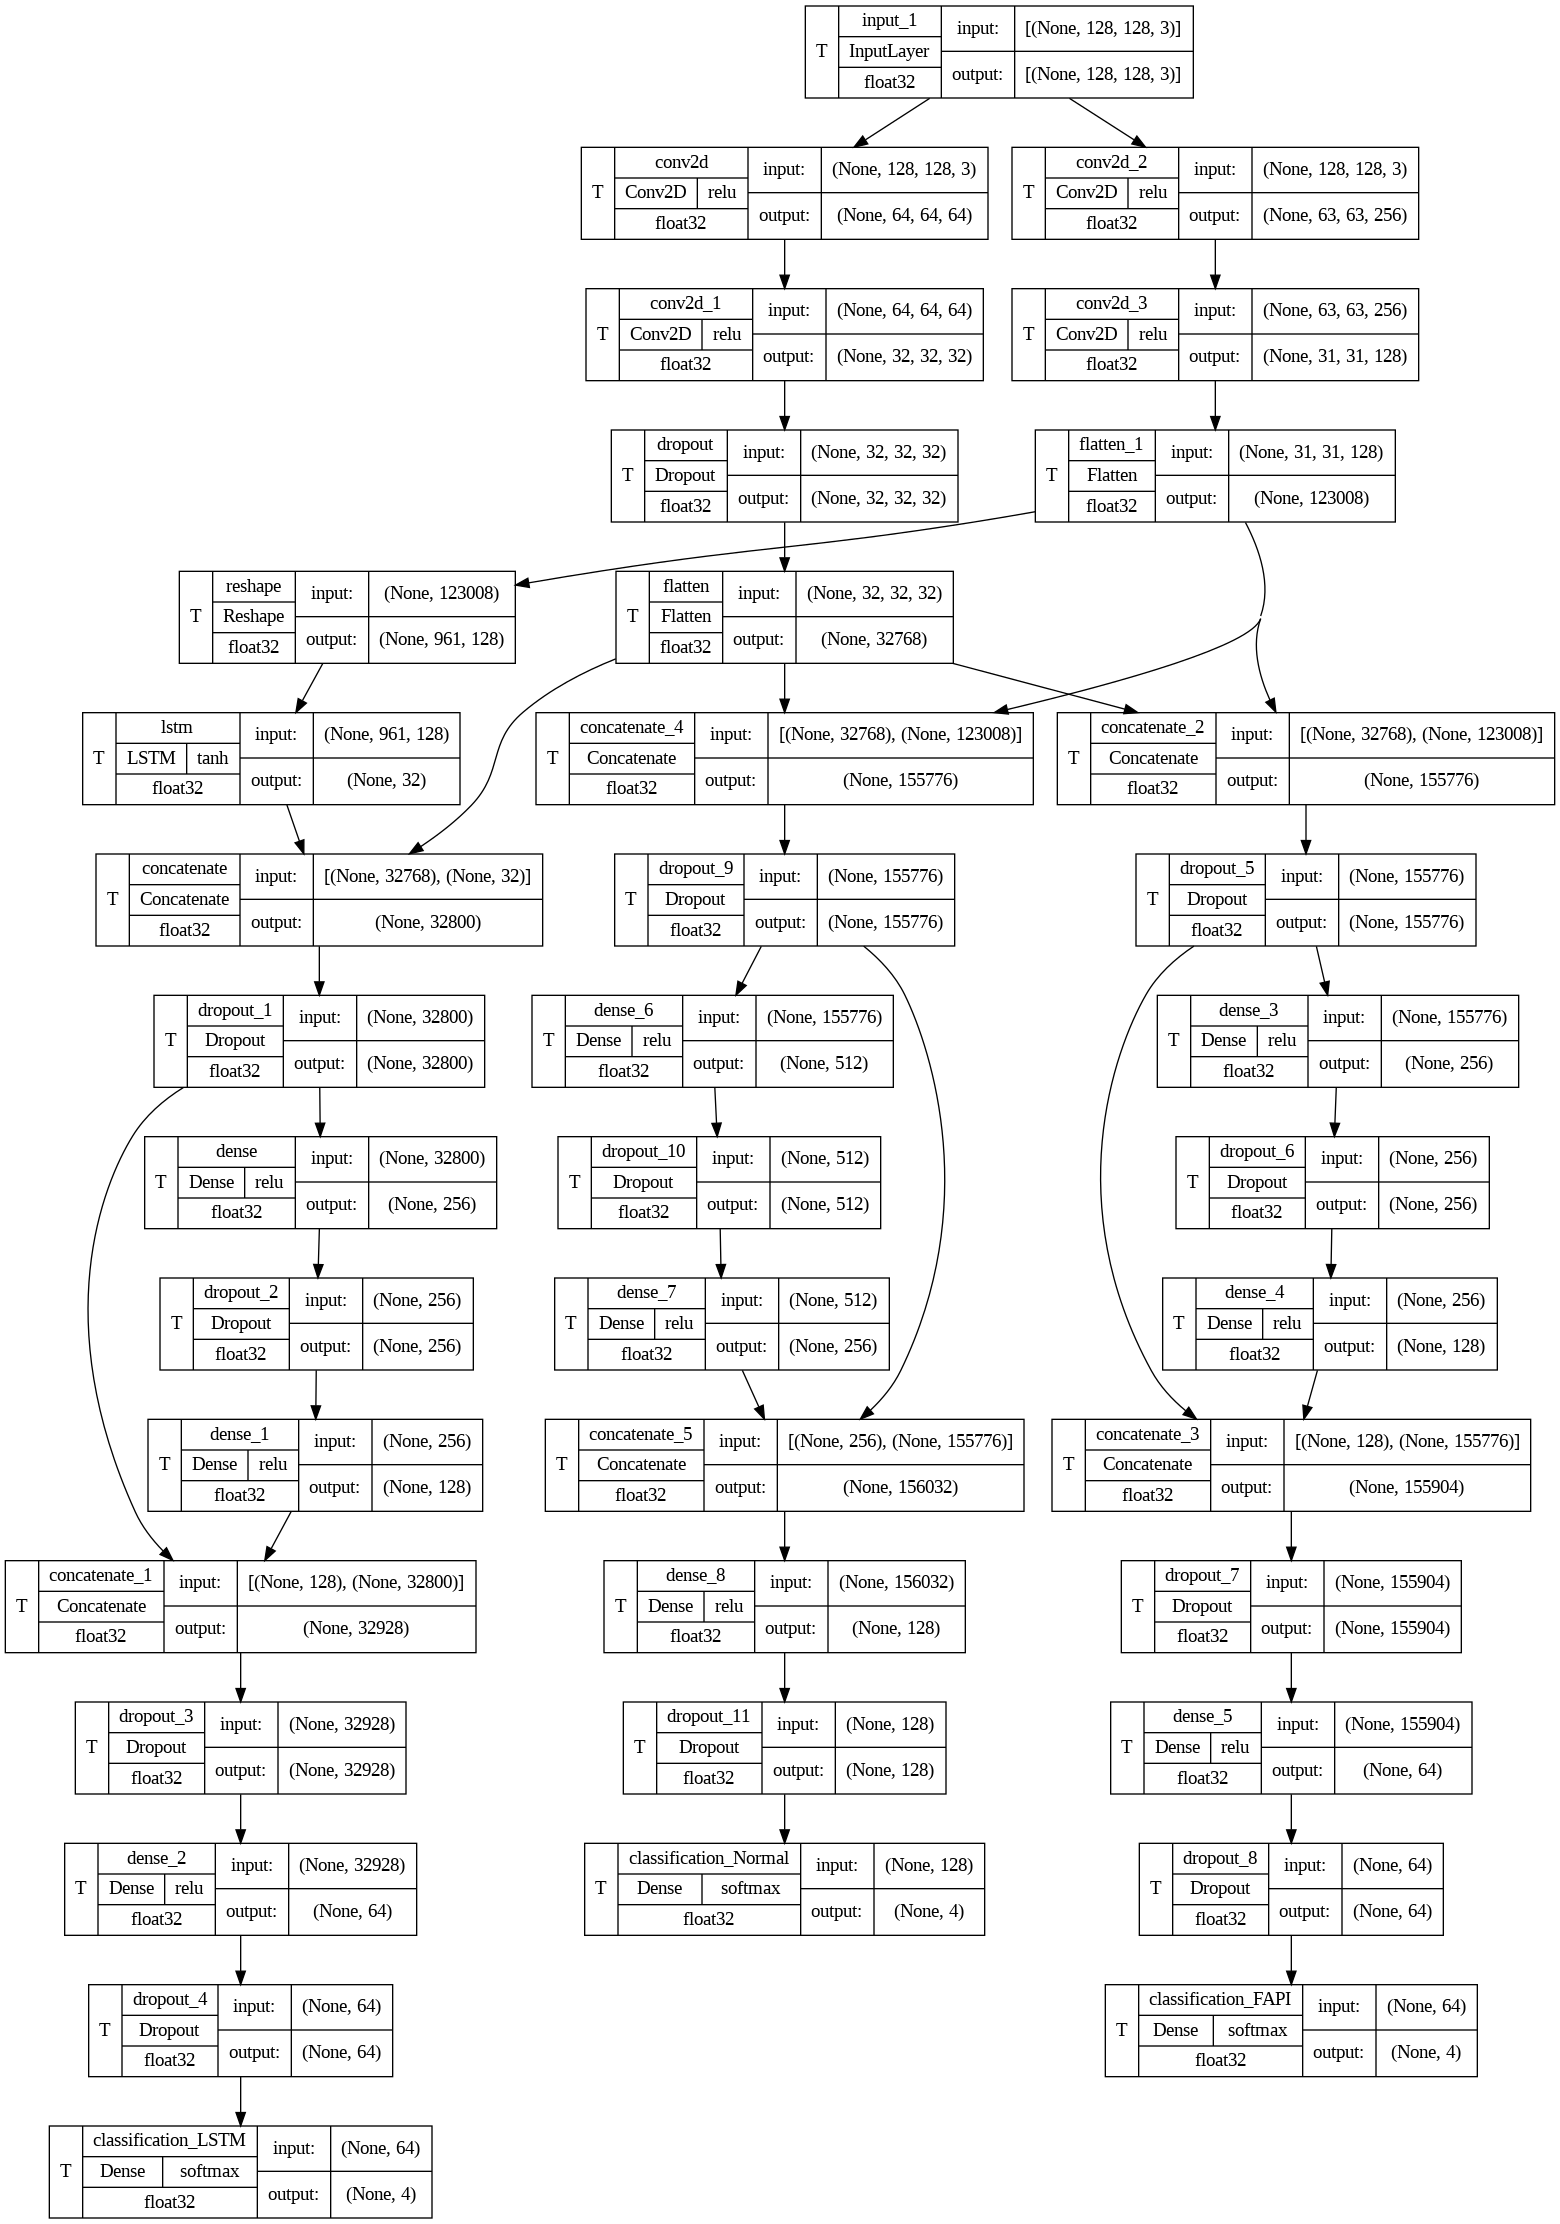

In [ ]:
plot_model(model = model,\
           show_shapes = True,\
           show_dtype = True,\
           show_layer_names = True,\
           show_layer_activations = True,\
           show_trainable = True)

In [ ]:
history = model.fit(x = X_train,\
                    y = y_train,\
                    epochs = 200,\
                    batch_size = 128,\
                    validation_data = (X_test, y_test),\
                    verbose = 1)

Epoch 1/200
56/56 [==============================] - 31s 322ms/step - loss: 10.7435 - classification_LSTM_loss: 1.3967 - classification_FAPI_loss: 1.7981 - classification_Normal_loss: 2.0914 - classification_LSTM_accuracy: 0.3253 - classification_FAPI_accuracy: 0.2504 - classification_Normal_accuracy: 0.4202 - val_loss: 5.0332 - val_classification_LSTM_loss: 0.9912 - val_classification_FAPI_loss: 1.3863 - val_classification_Normal_loss: 0.7285 - val_classification_LSTM_accuracy: 0.6546 - val_classification_FAPI_accuracy: 0.2497 - val_classification_Normal_accuracy: 0.6800
Epoch 2/200
56/56 [==============================] - 16s 293ms/step - loss: 4.6090 - classification_LSTM_loss: 0.8871 - classification_FAPI_loss: 1.3863 - classification_Normal_loss: 0.7714 - classification_LSTM_accuracy: 0.5911 - classification_FAPI_accuracy: 0.2492 - classification_Normal_accuracy: 0.6129 - val_loss: 3.8816 - val_classification_LSTM_loss: 0.6357 - val_classification_FAPI_loss: 1.3863 - val_classific

###Do the `Majority Voting` to Find the result

* For the `validation` data result
* For the `testing` data result

In [ ]:
#### This Neural network responsible to provide three output ####
predicted_LSTM,\
predicted_FAPI,\
predicted_Normal = model.predict(X_validation_normalised)
predicted_LSTM   = np.argmax(predicted_LSTM,\
                             axis = 1)
predicted_FAPI   = np.argmax(predicted_FAPI,\
                             axis = 1)
predicted_Normal = np.argmax(predicted_Normal,\
                             axis = 1)

#### Initialize the empty voting list ####
voting_predicted = []

#### This is responsible to find the majority voting result as predixtion ####
for prediction1,\
    prediction2,\
    prediction3 in zip(predicted_LSTM,\
                        predicted_FAPI,\
                        predicted_Normal):
  voting_result = list(dict(sorted(dict(Counter([prediction1,\
                                                 prediction2,\
                                                 prediction1])).items(),\
                                    key = lambda item: item[1],\
                                    reverse = True)).keys())[0]

  voting_predicted.append(voting_result)

#### Print the result ####
print('The accuracy of this Neural Network is with respect to validation  = {} '.format(accuracy_score(voting_predicted, y_val),'\n'))
print('The precision of this Neural Network is with respect to validation = {} '.format(precision_score(voting_predicted, y_val, average = 'macro'),'\n'))
print('The reacll of this Neural Network is with respect to validation    = {} '.format(recall_score(voting_predicted, y_val, average = 'macro'),'\n'))
print('The f1_score of this Neural Network is with respect to validation  = {} '.format(f1_score(voting_predicted, y_val, average = 'macro')))

40/40 [==============================] - 2s 29ms/step
The accuracy of this Neural Network is with respect to validation  = 0.9593432369038312 
The precision of this Neural Network is with respect to validation = 0.962092228651237 
The reacll of this Neural Network is with respect to validation    = 0.9768214839892793 
The f1_score of this Neural Network is with respect to validation  = 0.9687705307208595 


In [ ]:
#### This Neural network responsible to provide three output ####
predicted_LSTM,\
predicted_FAPI,\
predicted_Normal = model.predict(X_test)
predicted_LSTM   = np.argmax(predicted_LSTM,\
                             axis = 1)
predicted_FAPI   = np.argmax(predicted_FAPI,\
                             axis = 1)
predicted_Normal = np.argmax(predicted_Normal,\
                             axis = 1)

#### Initialize the empty voting list ####
voting_predicted = []

#### This is responsible to find the majority voting result as predixtion ####
for prediction1,\
    prediction2,\
    prediction3 in zip(predicted_LSTM,\
                        predicted_FAPI,\
                        predicted_Normal):
  voting_result = list(dict(sorted(dict(Counter([prediction1,\
                                                 prediction2,\
                                                 prediction1])).items(),\
                                    key = lambda item: item[1],\
                                    reverse = True)).keys())[0]

  voting_predicted.append(voting_result)

#### Print the result ####
print('The accuracy of this Neural Network is with respect to testing  = {} '.format(accuracy_score(voting_predicted, y_test),'\n'))
print('The precision of this Neural Network is with respect to testing = {} '.format(precision_score(voting_predicted, y_test, average = 'macro'),'\n'))
print('The reacll of this Neural Network is with respect to testing    = {} '.format(recall_score(voting_predicted, y_test, average = 'macro'),'\n'))
print('The f1_score of this Neural Network is with respect to testing  = {} '.format(f1_score(voting_predicted, y_test, average = 'macro')))

96/96 [==============================] - 2s 21ms/step
The accuracy of this Neural Network is with respect to testing  = 0.9759114583333334 
The precision of this Neural Network is with respect to testing = 0.9760386054372329 
The reacll of this Neural Network is with respect to testing    = 0.9766588561402075 
The f1_score of this Neural Network is with respect to testing  = 0.9760879205845409 


####Plot the loss and accuracy score

In [ ]:
history.history.keys()

dict_keys(['loss', 'classification_LSTM_loss', 'classification_FAPI_loss', 'classification_Normal_loss', 'classification_LSTM_accuracy', 'classification_FAPI_accuracy', 'classification_Normal_accuracy', 'val_loss', 'val_classification_LSTM_loss', 'val_classification_FAPI_loss', 'val_classification_Normal_loss', 'val_classification_LSTM_accuracy', 'val_classification_FAPI_accuracy', 'val_classification_Normal_accuracy'])

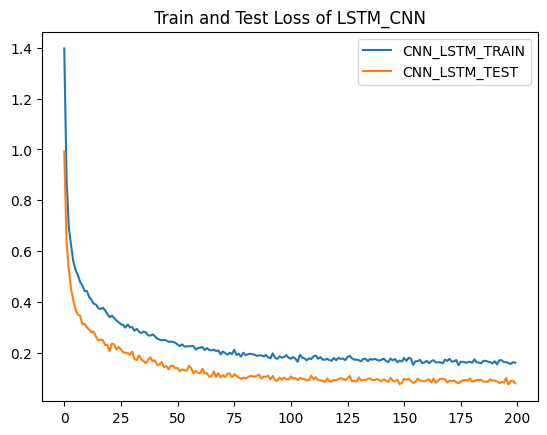

In [ ]:
plt.title('Train and Test Loss of LSTM_CNN')
plt.plot(history.history['classification_LSTM_loss'], label = 'CNN_LSTM_TRAIN')
plt.plot(history.history['val_classification_LSTM_loss'], label = 'CNN_LSTM_TEST')
plt.legend()
plt.show()

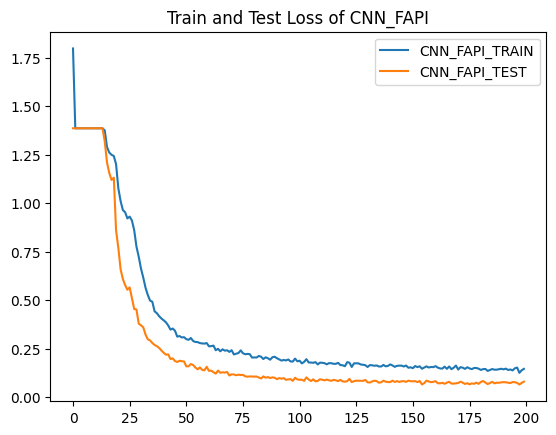

In [ ]:
plt.title('Train and Test Loss of CNN_FAPI')
plt.plot(history.history['classification_FAPI_loss'], label = 'CNN_FAPI_TRAIN')
plt.plot(history.history['val_classification_FAPI_loss'], label = 'CNN_FAPI_TEST')
plt.legend()
plt.show()

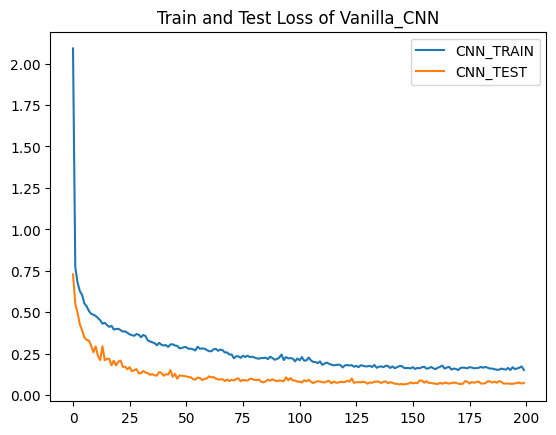

In [ ]:
plt.title('Train and Test Loss of Vanilla_CNN')
plt.plot(history.history['classification_Normal_loss'], label = 'CNN_TRAIN')
plt.plot(history.history['val_classification_Normal_loss'], label = 'CNN_TEST')
plt.legend()
plt.show()

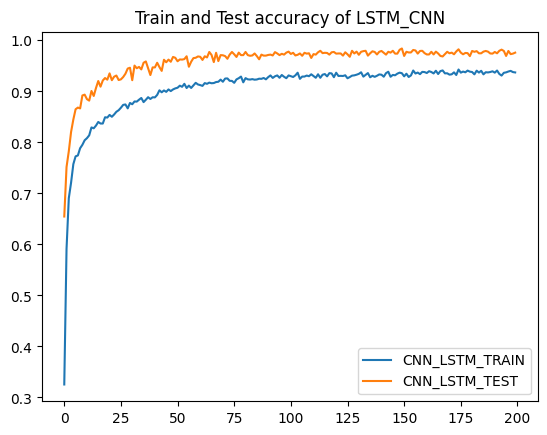

In [ ]:
plt.title('Train and Test accuracy of LSTM_CNN')
plt.plot(history.history['classification_LSTM_accuracy'], label = 'CNN_LSTM_TRAIN')
plt.plot(history.history['val_classification_LSTM_accuracy'], label = 'CNN_LSTM_TEST')
plt.legend()
plt.show()

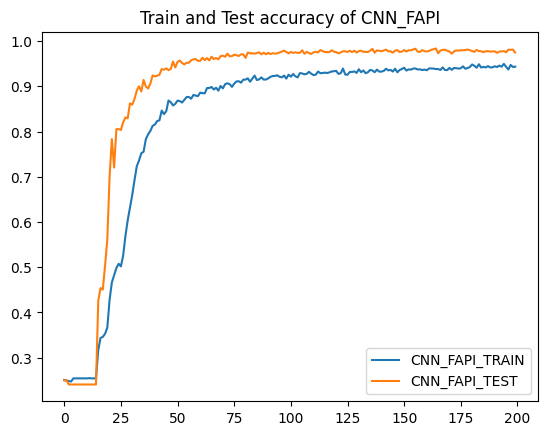

In [ ]:
plt.title('Train and Test accuracy of CNN_FAPI')
plt.plot(history.history['classification_FAPI_accuracy'], label = 'CNN_FAPI_TRAIN')
plt.plot(history.history['val_classification_FAPI_accuracy'], label = 'CNN_FAPI_TEST')
plt.legend()
plt.show()

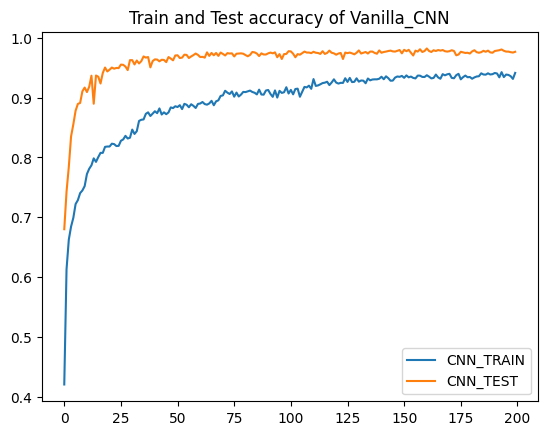

In [ ]:
plt.title('Train and Test accuracy of Vanilla_CNN')
plt.plot(history.history['classification_Normal_accuracy'], label = 'CNN_TRAIN')
plt.plot(history.history['val_classification_Normal_accuracy'], label = 'CNN_TEST')
plt.legend()
plt.show()

###Do the KFold -5 on the Beast Architecture

In [ ]:
Kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
accuracy, precision, recall, f1, count = [], [], [], [], 1

for train_index, test_index in Kfold.split(X_train_normalised):

  print('# of Cross Validation is {} is running'.format(count),'\n'.title())

  X_train, X_test = X_train_normalised[train_index], X_train_normalised[test_index]
  y_train, y_test = y[train_index], y[test_index]

  history = model.fit(x = X_train,\
                    y = y_train,\
                    epochs = 80,\
                    batch_size = 128,\
                    validation_data = (X_test, y_test),\
                    verbose = 1)
  

  #### This Neural network responsible to provide three output ####
  predicted_LSTM,\
  predicted_FAPI,\
  predicted_Normal = model.predict(X_test)
  predicted_LSTM   = np.argmax(predicted_LSTM,\
                              axis = 1)
  predicted_FAPI   = np.argmax(predicted_FAPI,\
                              axis = 1)
  predicted_Normal = np.argmax(predicted_Normal,\
                              axis = 1)

  #### Initialize the empty voting list ####
  voting_predicted = []

  #### This is responsible to find the majority voting result as predixtion ####
  for prediction1,\
      prediction2,\
      prediction3 in zip(predicted_LSTM,\
                          predicted_FAPI,\
                          predicted_Normal):
    voting_result = list(dict(sorted(dict(Counter([prediction1,\
                                                  prediction2,\
                                                  prediction1])).items(),\
                                      key = lambda item: item[1],\
                                      reverse = True)).keys())[0]

    voting_predicted.append(voting_result)

  #### Print the result ####
  print('The accuracy of this Neural Network is with respect to testing  = {} '.format(accuracy_score(voting_predicted, y_test),'\n'))
  print('The precision of this Neural Network is with respect to testing = {} '.format(precision_score(voting_predicted, y_test, average = 'macro'),'\n'))
  print('The reacll of this Neural Network is with respect to testing    = {} '.format(recall_score(voting_predicted, y_test, average = 'macro'),'\n'))
  print('The f1_score of this Neural Network is with respect to testing  = {} '.format(f1_score(voting_predicted, y_test, average = 'macro')))

  accuracy.append(accuracy_score(voting_predicted, y_test))
  precision.append(precision_score(voting_predicted, y_test, average = 'macro'))
  recall.append(recall_score(voting_predicted, y_test, average = 'macro'))
  f1.append(f1_score(voting_predicted, y_test, average = 'macro'))

  count = count + 1

# of Cross Validation is 1 is running 

Epoch 1/80
64/64 [==============================] - 38s 293ms/step - loss: 8.8542 - classification_LSTM_loss: 1.3481 - classification_FAPI_loss: 1.2424 - classification_Normal_loss: 1.6178 - classification_LSTM_accuracy: 0.3444 - classification_FAPI_accuracy: 0.4332 - classification_Normal_accuracy: 0.4132 - val_loss: 3.9367 - val_classification_LSTM_loss: 0.8473 - val_classification_FAPI_loss: 0.6427 - val_classification_Normal_loss: 0.7997 - val_classification_LSTM_accuracy: 0.7021 - val_classification_FAPI_accuracy: 0.7485 - val_classification_Normal_accuracy: 0.6978
Epoch 2/80
64/64 [==============================] - 17s 268ms/step - loss: 3.6915 - classification_LSTM_loss: 0.7831 - classification_FAPI_loss: 0.6956 - classification_Normal_loss: 0.8246 - classification_LSTM_accuracy: 0.6512 - classification_FAPI_accuracy: 0.6866 - classification_Normal_accuracy: 0.5872 - val_loss: 2.7538 - val_classification_LSTM_loss: 0.5301 - val_classificat

###Print the performance after using Kfold = 5

In [ ]:
  #### Print the result ####
  print('The accuracy of this Neural Network is with respect to K-5 CV  = {} '.format(np.array(accuracy).mean(),'\n'))
  print('The precision of this Neural Network is with respect to K-5 CV = {} '.format(np.array(precision).mean(),'\n'))
  print('The reacll of this Neural Network is with respect to K-5 CV    = {} '.format(np.array(recall).mean(),'\n'))
  print('The f1_score of this Neural Network is with respect to K-5 CV  = {} '.format(np.array(f1).mean()))

The accuracy of this Neural Network is with respect to K-5 CV  = 0.98212890625 
The precision of this Neural Network is with respect to K-5 CV = 0.9821146923172621 
The reacll of this Neural Network is with respect to K-5 CV    = 0.9829043867972459 
The f1_score of this Neural Network is with respect to K-5 CV  = 0.9821782996657132 


#### Save the `MODEL` for further work

In [ ]:
try:
  model.save('model.h5')
except Exception as e:
  print(e.with_traceback())
else:
  print('Model successfully saved'.title())

Model Successfully Saved


####`Load` the model and show the performance of `Evaluation` data

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/model.h5')

####Plot the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0

In [ ]:
##### Show the performance of this model #####
predicted = model.predict(X_validation_normalised)
predicted = np.argmax(predicted, axis = 1)

print('\nThe accuracy of this Neural Network is  = {} '.format(accuracy_score(predicted,\
                                                                              y_val),'\n'))
print('The precision of this Neural Network is = {} '.format(precision_score(predicted, y_val,\
                                                                             average = 'macro'),'\n'))
print('The reacll of this Neural Network is    = {} '.format(recall_score(predicted, y_val,\
                                                                          average = 'macro'),'\n'))
print('The f1_score of this Neural Network is  = {} '.format(f1_score(predicted, y_val,\
                                                                      average = 'macro')))

40/40 [==============================] - 1s 10ms/step

The accuracy of this Neural Network is  = 0.90852228303362 
The precision of this Neural Network is = 0.9155766784716679 
The reacll of this Neural Network is    = 0.9397671329753067 
The f1_score of this Neural Network is  = 0.9260239502434559 


####Use `KFold` - 3 Cross validation to prevent the overfitting problem and check the model performance

In [ ]:
KFold_ = KFold(n_splits = 3, random_state = 42, shuffle = True)

accuracy, precision, recall, f1, count = [], [], [], [], 1

for train_index, test_index in KFold_.split(X_train_normalised):

  print('# of Cross Validation is {} is running'.title().format(count),'\n\n')
  X_train, X_test = X_train_normalised[train_index], X_train_normalised[test_index]
  y_train_, y_test_ = y_train[train_index], y_train[test_index]

  model = Sequential()

  #### Create first Convolutional Layer with 32 kernels ####
  model.add(Conv2D(filters = 64, kernel_size = (3, 3),\
                    strides = (1, 1),\
                    padding = 'valid',\
                    activation = 'relu',\
                    kernel_initializer = 'he_normal',\
                    input_shape = X_train.shape[1:]))

  #### Use the MaxPooling Layer with Strides = 2, shape = (2, 2) ####
  model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))

  #### Create second Convolutional Layer with 32 kernels ####
  model.add(Conv2D(filters = 32,\
                    kernel_size = (3, 3),\
                    strides = (1, 1),\
                    padding = 'valid',\
                    activation = 'relu' ,\
                    kernel_initializer = 'he_normal'))

  #### Use the MaxPooling Layer with Strides = 2, shape = (2, 2) ####
  model.add(MaxPool2D(pool_size = (2, 2),\
                        strides = (2, 2),\
                        padding = 'valid'))


  #### Create third and last Convolutional Layer with 16 filters ####
  model.add(Conv2D(filters = 16,\
                    kernel_size = (3, 3),\
                    strides = (1, 1),\
                    padding = 'valid',\
                    activation = 'relu',\
                    kernel_initializer = 'he_normal'))

  #### Use the MaxPooling Layer with shape (2, 2) and Strides = (2, 2) ####
  model.add(MaxPool2D(pool_size = (2, 2),\
                        strides = (2, 2),\
                        padding = 'valid'))

  #### Flatten the Convolutional Layer ####
  model.add(Flatten())

  #### Create first hidden layer with 256 neurons with L2 regularization ####
  model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal'))

  #### Use the Dropout Layer with the p value = 0.5 ####
  model.add(Dropout(0.6))

  #### Create second hidden layer with 128 neurons ####
  model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2()))

  #### Use the Dropout Layer with the p value = 0.5 ####
  model.add(Dropout(0.6))

  #### Create an output layer with softmax ####
  model.add(Dense(units = 4, activation = 'softmax'))

  #### Compile the model ####
  model.compile(optimizer = 'Adam', loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

  history = model.fit(x = X_train, y = y_train_, epochs = 100, batch_size = 128, validation_data = (X_test, y_test_), verbose = 1, class_weight = sklearn_weights)

  predicted_ = model.predict(X_test)
  predicted_ = np.argmax(predicted_, axis = 1)

  print('The accuracy of this Neural Network is  = {} '.format(accuracy_score(predicted_, y_test_),'\n'))
  print('The precision of this Neural Network is = {} '.format(precision_score(predicted_, y_test_, average = 'macro'),'\n'))
  print('The reacll of this Neural Network is    = {} '.format(recall_score(predicted_, y_test_, average = 'macro'),'\n'))
  print('The f1_score of this Neural Network is  = {} '.format(f1_score(predicted_, y_test_, average = 'macro'),'\n\n'))
  
  accuracy.append(accuracy_score(predicted_, y_test_))
  precision.append(precision_score(predicted_, y_test_, average = 'macro'))
  recall.append(recall_score(predicted_, y_test_, average = 'macro'))
  f1.append(f1_score(predicted_, y_test_, average = 'macro'))

  count = count + 1

# Of Cross Validation Is 1 Is Running 


Epoch 1/100
54/54 [==============================] - 18s 115ms/step - loss: 2.3353 - accuracy: 0.2901 - val_loss: 1.9198 - val_accuracy: 0.6388
Epoch 2/100
54/54 [==============================] - 4s 73ms/step - loss: 1.4910 - accuracy: 0.5617 - val_loss: 0.9888 - val_accuracy: 0.6980
Epoch 3/100
54/54 [==============================] - 4s 74ms/step - loss: 0.9847 - accuracy: 0.6824 - val_loss: 0.7505 - val_accuracy: 0.7493
Epoch 4/100
54/54 [==============================] - 4s 74ms/step - loss: 0.7924 - accuracy: 0.7266 - val_loss: 0.6288 - val_accuracy: 0.7709
Epoch 5/100
54/54 [==============================] - 4s 73ms/step - loss: 0.6586 - accuracy: 0.7551 - val_loss: 0.5017 - val_accuracy: 0.8240
Epoch 6/100
54/54 [==============================] - 4s 73ms/step - loss: 0.5631 - accuracy: 0.7820 - val_loss: 0.4350 - val_accuracy: 0.8266
Epoch 7/100
54/54 [==============================] - 4s 72ms/step - loss: 0.5212 - accuracy: 0.7958 - val

In [ ]:
print('Using KFold - 3, the accuracy is  = {}'.format(np.array(accuracy).mean(),'\n'))
print('Using KFold - 3, the precision is = {}'.format(np.array(precision).mean(),'\n'))
print('Using KFold - 3, the recall is    = {}'.format(np.array(recall).mean(),'\n'))
print('Using KFold - 3, the f1 score is  = {}'.format(np.array(f1).mean(),'\n'))

Using KFold - 3, the accuracy is  = 0.9614250748642306
Using KFold - 3, the precision is = 0.9614633754605251
Using KFold - 3, the recall is    = 0.961719936804057
Using KFold - 3, the f1 score is  = 0.9614580179600067


#Use `Transfer Learning` Technique to check the performance with respect to Dataset

* VGG16
* ResNet
* InceptionNet
* MobileNet

###`VGG16` - Model used to evaluate the model

In [ ]:
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNet

In [ ]:
def VGG16_model_function(include_top = None, weights = None, input_shape = None, classes = None):
  if len(input_shape) == 0:
    raise listEmptyException('Input shape is empty'.title())
  else:
    print('Welcome to VGG16')
    VGG16_model = VGG16(include_top = include_top,\
                        weights = weights,\
                        input_shape = input_shape,\
                        classes = classes)
  
  return VGG16_model

try:
  VGG16_model = VGG16_model_function(include_top = False,\
                      weights = 'imagenet',\
                      input_shape = X_train.shape[1:],\
                      classes = len(np.unique(y_train)))
except listEmptyException as e:
  print('The exception is {}'.format(e))
except Exception as e:
  print('The exception is {}'.format(e))
else:
  VGG16_model.summary()

Welcome to VGG16
58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                             

#####Make the `trainable` parameter false

In [ ]:
try:
  VGG16_model.trainable = False
except Exception as e:
  print('The exception is {}'.format(e))
else:
  VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

####Do the `Fine-tuning` with respect to VGG16 model

In [ ]:
class VGG16Exception(Exception):
  def __init__(self, message):
    return message.title()

def VGG16_fine_tuning(VGG16_model = None, activate = None):
  if activate == 'YES':
    #### Create a sequential model ####
    model_VGG16 = Sequential()

    #### Add the VGG16 model to this sequential model ####
    model_VGG16.add(VGG16_model)

    #### Do the Flatten operation ####
    model_VGG16.add(Flatten())

    #### Add the user defined - fully connected layer with respect to problem description ####

    model_VGG16.add(Dense(units = 512, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2(l2 = 0.01)))

    #### Use the Dropout layer with the ratio = 0.5 ####

    model_VGG16.add(Dropout(rate = 0.1))

    #### Add another connected layer with neurons 128 ####

    model_VGG16.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal'))

    #### Use the Dropout layer with the ratio = 0.6 ####

    model_VGG16.add(Dropout(rate = 0.6))

    #### Add the output layer ####
    model_VGG16.add(Dense(units = 4, activation = 'softmax'))

    #### Compile the model and check the performace ####
    model_VGG16.compile(optimizer = Adam(learning_rate = 0.0001), loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

  else:
    raise Exception('VGG16 cannot be accessible')
  
  return model_VGG16

try:
  VGG16_model = VGG16_fine_tuning(VGG16_model = VGG16_model, activate = 'YES')
except VGG16Exception as e:
  print('The exception is {}'.format(e))
except Exception as e:
  print('The exception is {}'.format(e))
else:
  VGG16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 5

####`plot` the VGG16 model as a graph

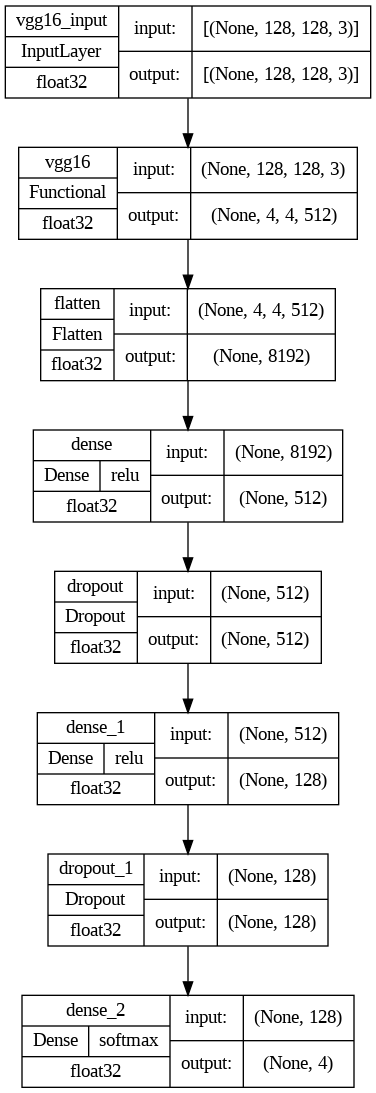

In [ ]:
plot_model(model = VGG16_model,\
           show_shapes = True,\
           show_dtype = True,\
           show_layer_names = True,\
           show_layer_activations = True)

In [ ]:
def training(x = None, y = None, epochs = None, batch_size = None):
  if (len(x) == 0 or len(y) == 0):
    raise listEmptyException('List is empty in VGG16'.title())
  else:
    history = VGG16_model.fit(x = x,\
                              y = y,\
                              epochs = epochs,\
                              batch_size = batch_size,\
                              verbose = 1,\
                              validation_data = (X_test, y_test))
  return history, VGG16_model

try:
  history, VGG16_model = training(x = X_train,\
                              y = y_train,\
                              epochs = 50,\
                              batch_size = 128)
except listEmptyException as e:
  print('The exception is {}'.format(e))
except Exception as e:
  print('The exception is {}'.format(e))
else:
  print('Completed !')  

Epoch 1/50
60/60 [==============================] - 27s 216ms/step - loss: 9.3601 - accuracy: 0.3932 - val_loss: 7.1920 - val_accuracy: 0.6062
Epoch 2/50
60/60 [==============================] - 12s 200ms/step - loss: 5.8911 - accuracy: 0.5759 - val_loss: 4.6235 - val_accuracy: 0.6824
Epoch 3/50
60/60 [==============================] - 12s 206ms/step - loss: 3.9518 - accuracy: 0.6525 - val_loss: 3.2363 - val_accuracy: 0.6984
Epoch 4/50
60/60 [==============================] - 13s 212ms/step - loss: 2.8531 - accuracy: 0.6863 - val_loss: 2.4074 - val_accuracy: 0.7324
Epoch 5/50
60/60 [==============================] - 13s 217ms/step - loss: 2.2084 - accuracy: 0.7132 - val_loss: 1.8974 - val_accuracy: 0.7563
Epoch 6/50
60/60 [==============================] - 13s 222ms/step - loss: 1.8381 - accuracy: 0.7215 - val_loss: 1.6177 - val_accuracy: 0.7785
Epoch 7/50
60/60 [==============================] - 14s 232ms/step - loss: 1.5825 - accuracy: 0.7423 - val_loss: 1.4361 - val_accuracy: 0.7746

####Check the performance `VGG16`

In [ ]:
print('The training performace of this model is given below.\n\n'.title())

predicted_ = VGG16_model.predict(X_train)
predicted_ = np.argmax(predicted_, axis = 1)

print('The accuracy of this Neural Network is = {} '.format(accuracy_score(predicted_, y_train),'\n'))
print('The precision of this Neural Network is  = {} '.format(precision_score(predicted_, y_train, average = 'macro'),'\n'))
print('The reacll of this Neural Network is     = {} '.format(recall_score(predicted_, y_train, average = 'macro'),'\n'))
print('The f1_score of this Neural Network is   = {} '.format(f1_score(predicted_, y_train, average = 'macro'),'\n\n'))

print('The testing performace of this model is given below.\n\n'.title())

predicted_ = VGG16_model.predict(X_test)
predicted_ = np.argmax(predicted_, axis = 1)

print('\nThe accuracy of this Neural Network is = {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision of this Neural Network is  = {} '.format(precision_score(predicted_, y_test, average = 'macro'),'\n'))
print('The reacll of this Neural Network is     = {} '.format(recall_score(predicted_, y_test, average = 'macro'),'\n'))
print('The f1_score of this Neural Network is   = {} '.format(f1_score(predicted_, y_test, average = 'macro'),'\n\n'))

The Training Performace Of This Model Is Given Below.


240/240 [==============================] - 12s 41ms/step
The accuracy of this Neural Network is = 0.937109375 
The precision of this Neural Network is  = 0.9373796156005102 
The reacll of this Neural Network is     = 0.9399236864430675 
The f1_score of this Neural Network is   = 0.9372358400554148 
The Testing Performace Of This Model Is Given Below.


80/80 [==============================] - 3s 41ms/step

The accuracy of this Neural Network is = 0.893359375 
The precision of this Neural Network is  = 0.8923187406112252 
The reacll of this Neural Network is     = 0.897130371656491 
The f1_score of this Neural Network is   = 0.8926269283180108 


####Show the `Classification` report to this model

In [ ]:
print('The classification report of this testing model is given below.\n'.capitalize())
print(classification_report(predicted_, y_test))

The classification report of this testing model is given below.

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       656
           1       1.00      0.98      0.99       643
           2       0.76      0.89      0.82       528
           3       0.88      0.77      0.82       733

    accuracy                           0.89      2560
   macro avg       0.89      0.90      0.89      2560
weighted avg       0.90      0.89      0.89      2560



####Plot the `Confusion` Matrix

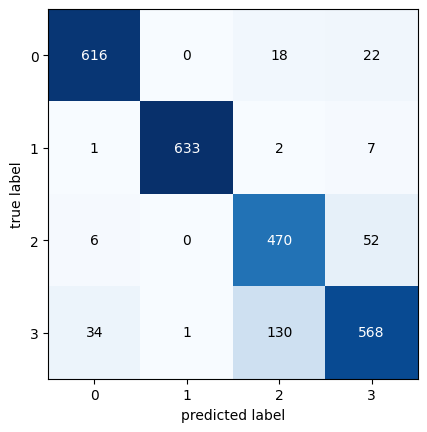

In [ ]:
#### Plot the confusion matrix ####
confusion_mat = confusion_matrix(predicted_, y_test)

fig, ax = plot_confusion_matrix(conf_mat = confusion_mat)

plt.show()

####Plot `train and test` loss and `train and test` accuracy

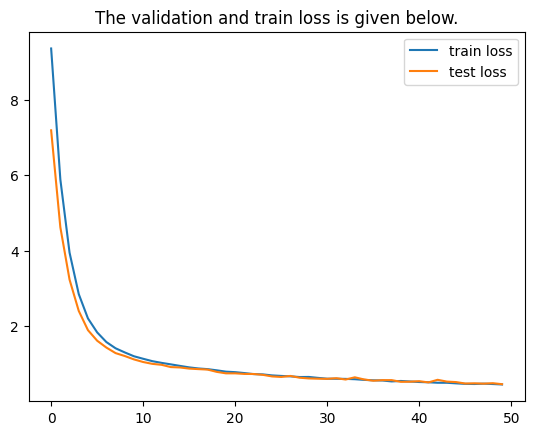

************************************************************************************************************************ 



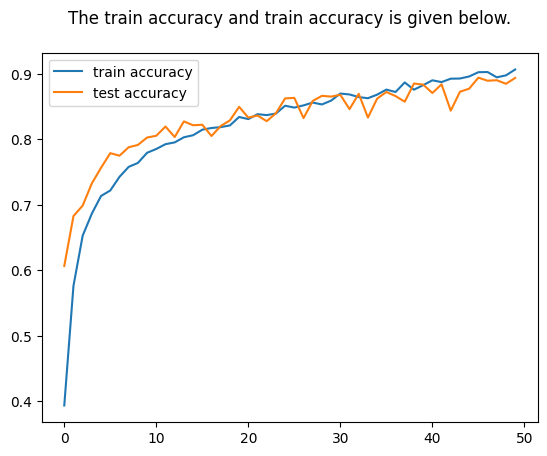

In [ ]:
##### Plot the validation loss and train loss #####
plt.title('The validation and train loss is given below.')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

print('*'*120,'\n')

plt.title('The train accuracy and train accuracy is given below.\n')
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

#Use `ResNet` architecture with respect to this dataset

In [ ]:
def ResNet_model_function(include_top = None, weights = None, input_shape = None, classes = None):
  if len(input_shape) == 0:
    raise listEmptyException('Input shape is empty'.title())
  else:
    print('Welcome to ResNet')
    ResNet_model = ResNet50(include_top = include_top,\
                        weights = weights,\
                        input_shape = input_shape,\
                        classes = classes)
  
  return VGG16_model

try:
  ResNet_model = ResNet_model_function(include_top = False,\
                      weights = 'imagenet',\
                      input_shape = X_train.shape[1:],\
                      classes = len(np.unique(y_train)))
except listEmptyException as e:
  print('The exception is {}'.format(e))
except Exception as e:
  print('The exception is {}'.format(e))
else:
  ResNet_model.summary()

Welcome to ResNet
94765736/94765736 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                       

#####Make the `trainable` parameter false

In [ ]:
try:
  ResNet_model.trainable = False
except Exception as e:
  print('The exception is {}'.format(e))
else:
  ResNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 5

####Do the `Fine-tuning` with respect to ResNet50 model

In [ ]:
class ResNetException(Exception):
  def __init__(self, message):
    return message.title()

def ResNet_fine_tuning(ResNet_model = None, activate = None):
  if activate == 'YES':
    #### Create a sequential model ####
    model_ResNet = Sequential()

    #### Add the ResNet model to this sequential model ####
    model_ResNet.add(ResNet_model)

    #### Do the Flatten operation ####
    model_ResNet.add(Flatten())

    #### Add the user defined - fully connected layer with respect to problem description ####

    model_ResNet.add(Dense(units = 512, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2(l2 = 0.01)))

    #### Add another connected layer with neurons 128 ####

    model_ResNet.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal'))

    #### Use the Dropout layer with the ratio = 0.6 ####

    model_ResNet.add(Dropout(rate = 0.4))

    #### Add the output layer ####
    model_ResNet.add(Dense(units = 4, activation = 'softmax'))

    #### Compile the model and check the performace ####
    model_ResNet.compile(optimizer = Adam(learning_rate = 0.0001), loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

  else:
    raise Exception('ResNet cannot be accessible')
  
  return model_ResNet

try:
  model_ResNet = ResNet_fine_tuning(ResNet_model = ResNet_model, activate = 'YES')
except ResNetException as e:
  print('The exception is {}'.format(e))
except Exception as e:
  print('The exception is {}'.format(e))
else:
  model_ResNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 4)                 18975684  
                                                                 
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 512)               2560      
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 19,044,424
Trainable params: 68,740
Non-

####`plot` the VGG16 model as a graph

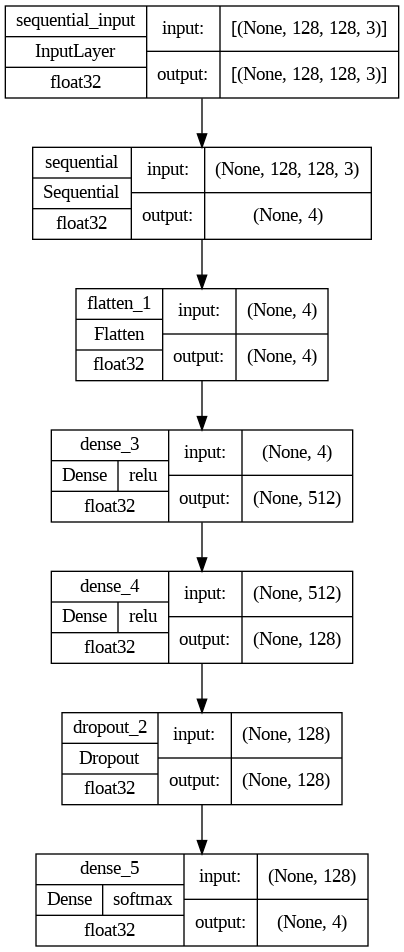

In [ ]:
plot_model(model = model_ResNet,\
           show_shapes = True,\
           show_dtype = True,\
           show_layer_names = True,\
           show_layer_activations = True)

In [ ]:
def training(x = None, y = None, epochs = None, batch_size = None):
  if (len(x) == 0 or len(y) == 0):
    raise listEmptyException('List is empty in ResNet50'.title())
  else:
    history = model_ResNet.fit(x = x,\
                              y = y,\
                              epochs = epochs,\
                              batch_size = batch_size,\
                              verbose = 1,\
                              validation_data = (X_test, y_test))
  return history, model_ResNet

try:
  history, model_ResNet = training(x = X_train,\
                              y = y_train,\
                              epochs = 20,\
                              batch_size = 64)
except listEmptyException as e:
  print('The exception is {}'.format(e))
except Exception as e:
  print('The exception is {}'.format(e))
else:
  print('Completed !')  

Epoch 1/20
120/120 [==============================] - 20s 122ms/step - loss: 11.1219 - accuracy: 0.8004 - val_loss: 10.7209 - val_accuracy: 0.8988
Epoch 2/20
120/120 [==============================] - 14s 119ms/step - loss: 10.5452 - accuracy: 0.9185 - val_loss: 10.4260 - val_accuracy: 0.9000
Epoch 3/20
120/120 [==============================] - 14s 113ms/step - loss: 10.2561 - accuracy: 0.9187 - val_loss: 10.1516 - val_accuracy: 0.9012
Epoch 4/20
120/120 [==============================] - 13s 109ms/step - loss: 9.9766 - accuracy: 0.9210 - val_loss: 9.8869 - val_accuracy: 0.9020
Epoch 5/20
120/120 [==============================] - 13s 108ms/step - loss: 9.7138 - accuracy: 0.9206 - val_loss: 9.6304 - val_accuracy: 0.9012
Epoch 6/20
120/120 [==============================] - 13s 109ms/step - loss: 9.4540 - accuracy: 0.9199 - val_loss: 9.3768 - val_accuracy: 0.9004
Epoch 7/20
120/120 [==============================] - 13s 109ms/step - loss: 9.2106 - accuracy: 0.9210 - val_loss: 9.1299 - 

####Check the performance `ResNet50`

In [ ]:
print('The training performace of ResNet50 model is given below.\n\n'.title())

predicted_ = model_ResNet.predict(X_train)
predicted_ = np.argmax(predicted_, axis = 1)

print('The accuracy of this Neural Network is = {} '.format(accuracy_score(predicted_, y_train),'\n'))
print('The precision of this Neural Network is  = {} '.format(precision_score(predicted_, y_train, average = 'macro'),'\n'))
print('The reacll of this Neural Network is     = {} '.format(recall_score(predicted_, y_train, average = 'macro'),'\n'))
print('The f1_score of this Neural Network is   = {} '.format(f1_score(predicted_, y_train, average = 'macro'),'\n\n'))

print('The testing performace of ResNet50 model is given below.\n\n'.title())

predicted_ = model_ResNet.predict(X_test)
predicted_ = np.argmax(predicted_, axis = 1)

print('\nThe accuracy of this Neural Network is = {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision of this Neural Network is  = {} '.format(precision_score(predicted_, y_test, average = 'macro'),'\n'))
print('The reacll of this Neural Network is     = {} '.format(recall_score(predicted_, y_test, average = 'macro'),'\n'))
print('The f1_score of this Neural Network is   = {} '.format(f1_score(predicted_, y_test, average = 'macro'),'\n\n'))

The Training Performace Of Resnet50 Model Is Given Below.


240/240 [==============================] - 10s 42ms/step
The accuracy of this Neural Network is = 0.9432291666666667 
The precision of this Neural Network is  = 0.9432605586874345 
The reacll of this Neural Network is     = 0.943348370803551 
The f1_score of this Neural Network is   = 0.9432866951378033 
The Testing Performace Of Resnet50 Model Is Given Below.


80/80 [==============================] - 3s 41ms/step

The accuracy of this Neural Network is = 0.900390625 
The precision of this Neural Network is  = 0.9001622785792429 
The reacll of this Neural Network is     = 0.8999959349409035 
The f1_score of this Neural Network is   = 0.9000749459792728 


####Show the `Classification` report to this model

In [ ]:
print('The classification report of this testing model is given below.\n'.capitalize())
print(classification_report(predicted_, y_test))

The classification report of this testing model is given below.

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       660
           1       1.00      0.99      1.00       636
           2       0.84      0.85      0.84       616
           3       0.83      0.83      0.83       648

    accuracy                           0.90      2560
   macro avg       0.90      0.90      0.90      2560
weighted avg       0.90      0.90      0.90      2560



####Plot the `Confusion` Matrix

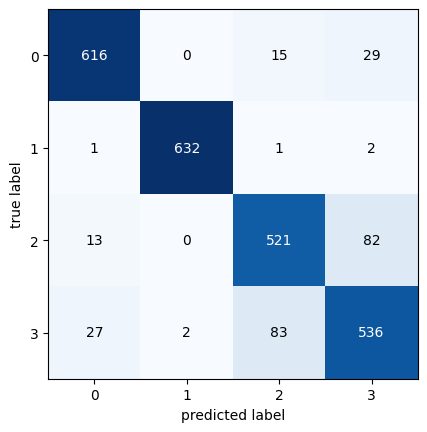

In [ ]:
#### Plot the confusion matrix ####
confusion_mat = confusion_matrix(predicted_, y_test)

fig, ax = plot_confusion_matrix(conf_mat = confusion_mat)

plt.show()

####Plot `train and test` loss and `train and test` accuracy

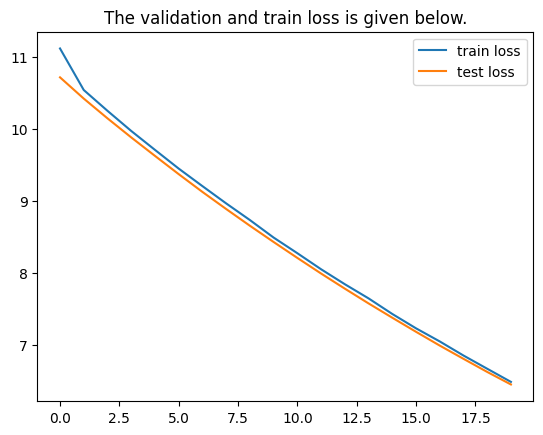

************************************************************************************************************************ 



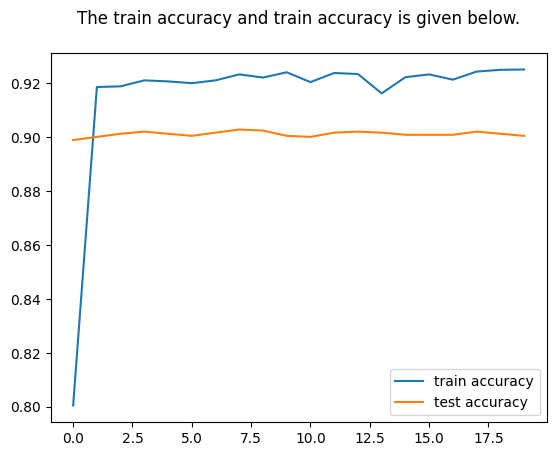

In [ ]:
##### Plot the validation loss and train loss #####
plt.title('The validation and train loss is given below.')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

print('*'*120,'\n')

plt.title('The train accuracy and train accuracy is given below.\n')
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

#Use `InceptionNet` architecture with respect to this dataset

In [ ]:
def Inception_model_function(include_top = None, weights = None, input_shape = None, classes = None):
  if len(input_shape) == 0:
    raise listEmptyException('Input shape is empty'.title())
  else:
    print('Welcome to ResNet')
    Inception_model = InceptionV3(include_top = include_top,\
                        weights = weights,\
                        input_shape = input_shape,\
                        classes = classes)
  
  return Inception_model

try:
  Inception_model = Inception_model_function(include_top = False,\
                      weights = 'imagenet',\
                      input_shape = X_train.shape[1:],\
                      classes = len(np.unique(y_train)))
except listEmptyException as e:
  print('The exception is {}'.format(e))
except Exception as e:
  print('The exception is {}'.format(e))
else:
  Inception_model.summary()

Welcome to ResNet
87910968/87910968 [==============================] - 4s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
    

#####Make the `trainable` parameter false

In [ ]:
try:
  Inception_model.trainable = False
except Exception as e:
  print('The exception is {}'.format(e))
else:
  Inception_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

####Do the `Fine-tuning` with respect to Inception model

In [ ]:
class InceptionNetException(Exception):
  def __init__(self, message):
    return message.title()

def Inception_fine_tuning(Inception_model = None, activate = None):
  if activate == 'YES':
    #### Create a sequential model ####
    model_InceptionNet = Sequential()

    #### Add the ResNet model to this sequential model ####
    model_InceptionNet.add(Inception_model)

    #### Do the Flatten operation ####
    model_InceptionNet.add(Flatten())

    #### Add the user defined - fully connected layer with respect to problem description ####

    model_InceptionNet.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal'))

    #### Use the Dropout layer with the ratio = 0.5 ####

    model_InceptionNet.add(Dropout(rate = 0.3))

    #### Add another connected layer with neurons 128 ####

    model_InceptionNet.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal'))

    #### Use the Dropout layer with the ratio = 0.6 ####

    model_InceptionNet.add(Dropout(rate = 0.4))

    #### Add the output layer ####
    model_InceptionNet.add(Dense(units = 4, activation = 'softmax'))

    #### Compile the model and check the performace ####
    model_InceptionNet.compile(optimizer = Adam(learning_rate = 0.0001), loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

  else:
    raise Exception('InceptionNet cannot be accessible')
  
  return model_InceptionNet

try:
  model_InceptionNet = Inception_fine_tuning(Inception_model = Inception_model, activate = 'YES')
except InceptionNetException as e:
  print('The exception is {}'.format(e))
except Exception as e:
  print('The exception is {}'.format(e))
else:
  model_InceptionNet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               1048704   
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 4)                

####`plot` the InceptionNet model as a graph

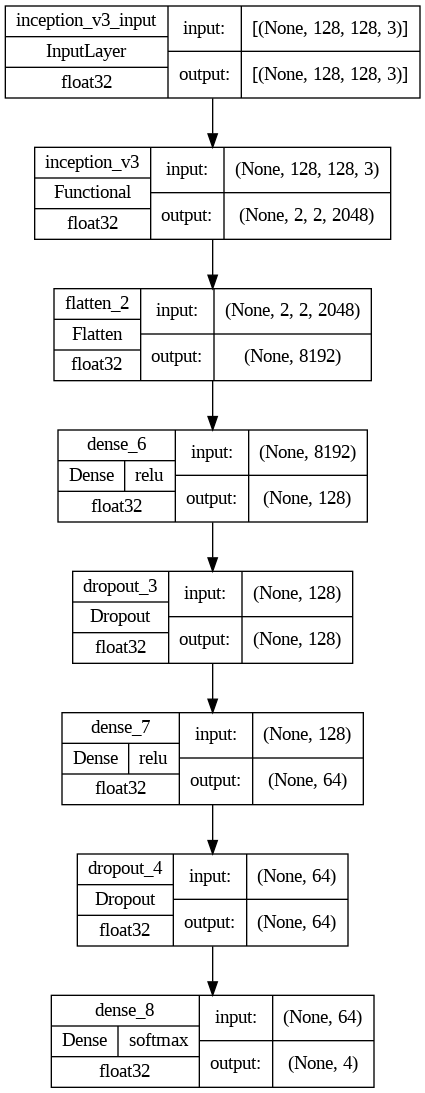

In [ ]:
plot_model(model = model_InceptionNet,\
           show_shapes = True,\
           show_dtype = True,\
           show_layer_names = True,\
           show_layer_activations = True)

In [ ]:
def training(x = None, y = None, epochs = None, batch_size = None):
  if (len(x) == 0 or len(y) == 0):
    raise listEmptyException('List is empty in model InceptionNet'.title())
  else:
    history = model_InceptionNet.fit(x = x,\
                              y = y,\
                              epochs = epochs,\
                              batch_size = batch_size,\
                              verbose = 1,\
                              validation_data = (X_test, y_test))
  return history, model_InceptionNet

try:
  history, model_InceptionNet = training(x = X_train,\
                              y = y_train,\
                              epochs = 20,\
                              batch_size = 128)
except listEmptyException as e:
  print('The exception is {}'.format(e))
except Exception as e:
  print('The exception is {}'.format(e))
else:
  print('Completed !')  

Epoch 1/20
60/60 [==============================] - 15s 141ms/step - loss: 1.4177 - accuracy: 0.3844 - val_loss: 1.0277 - val_accuracy: 0.5664
Epoch 2/20
60/60 [==============================] - 6s 99ms/step - loss: 1.0593 - accuracy: 0.5130 - val_loss: 0.8440 - val_accuracy: 0.6469
Epoch 3/20
60/60 [==============================] - 6s 101ms/step - loss: 0.9613 - accuracy: 0.5660 - val_loss: 0.7635 - val_accuracy: 0.6742
Epoch 4/20
60/60 [==============================] - 6s 101ms/step - loss: 0.8707 - accuracy: 0.6094 - val_loss: 0.7225 - val_accuracy: 0.6867
Epoch 5/20
60/60 [==============================] - 6s 102ms/step - loss: 0.8088 - accuracy: 0.6374 - val_loss: 0.6698 - val_accuracy: 0.7105
Epoch 6/20
60/60 [==============================] - 6s 102ms/step - loss: 0.7758 - accuracy: 0.6520 - val_loss: 0.6383 - val_accuracy: 0.7266
Epoch 7/20
60/60 [==============================] - 6s 101ms/step - loss: 0.7342 - accuracy: 0.6759 - val_loss: 0.6085 - val_accuracy: 0.7203
Epoch 

####Check the performance `InceptionNet`

In [ ]:
print('The training performace of InceptionNet model is given below.\n\n'.title())

predicted_ = model_InceptionNet.predict(X_train)
predicted_ = np.argmax(predicted_, axis = 1)

print('The accuracy of this Neural Network is = {} '.format(accuracy_score(predicted_, y_train),'\n'))
print('The precision of this Neural Network is  = {} '.format(precision_score(predicted_, y_train, average = 'macro'),'\n'))
print('The reacll of this Neural Network is     = {} '.format(recall_score(predicted_, y_train, average = 'macro'),'\n'))
print('The f1_score of this Neural Network is   = {} '.format(f1_score(predicted_, y_train, average = 'macro'),'\n\n'))

print('The testing performace of ResNet50 model is given below.\n\n'.title())

predicted_ = model_InceptionNet.predict(X_test)
predicted_ = np.argmax(predicted_, axis = 1)

print('\nThe accuracy of this Neural Network is = {} '.format(accuracy_score(predicted_, y_test),'\n'))
print('The precision of this Neural Network is  = {} '.format(precision_score(predicted_, y_test, average = 'macro'),'\n'))
print('The reacll of this Neural Network is     = {} '.format(recall_score(predicted_, y_test, average = 'macro'),'\n'))
print('The f1_score of this Neural Network is   = {} '.format(f1_score(predicted_, y_test, average = 'macro'),'\n\n'))

The Training Performace Of Inceptionnet Model Is Given Below.


240/240 [==============================] - 8s 23ms/step
The accuracy of this Neural Network is = 0.817578125 
The precision of this Neural Network is  = 0.8169858479244576 
The reacll of this Neural Network is     = 0.8257546500319926 
The f1_score of this Neural Network is   = 0.8143686041115529 
The Testing Performace Of Resnet50 Model Is Given Below.


80/80 [==============================] - 2s 22ms/step

The accuracy of this Neural Network is = 0.773828125 
The precision of this Neural Network is  = 0.7754969034462695 
The reacll of this Neural Network is     = 0.7784407726427209 
The f1_score of this Neural Network is   = 0.7704376794826641 


####Show the `Classification` report to this model

In [ ]:
print('The classification report of this testing model is given below.\n'.capitalize())
print(classification_report(predicted_, y_test))

The classification report of this testing model is given below.

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       614
           1       1.00      0.99      0.99       635
           2       0.82      0.62      0.70       822
           3       0.48      0.64      0.55       489

    accuracy                           0.77      2560
   macro avg       0.78      0.78      0.77      2560
weighted avg       0.80      0.77      0.78      2560



####Plot the `Confusion` Matrix

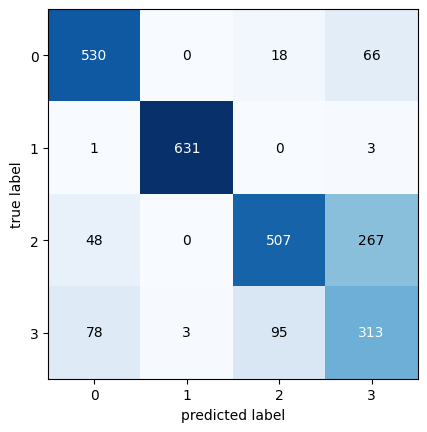

In [ ]:
#### Plot the confusion matrix ####
confusion_mat = confusion_matrix(predicted_, y_test)

fig, ax = plot_confusion_matrix(conf_mat = confusion_mat)

plt.show()

####Plot `train and test` loss and `train and test` accuracy

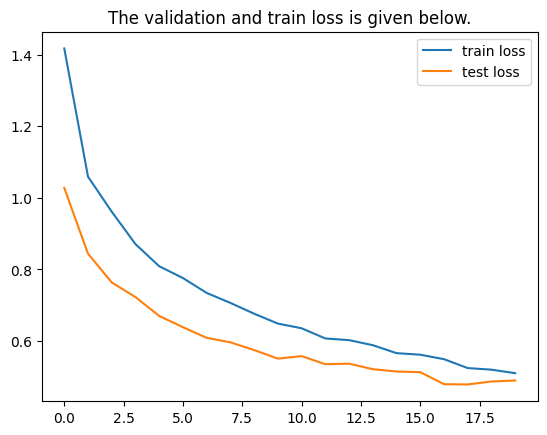

************************************************************************************************************************ 



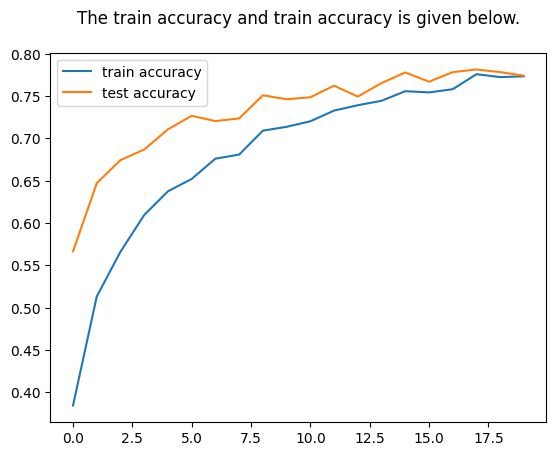

In [ ]:
##### Plot the validation loss and train loss #####
plt.title('The validation and train loss is given below.')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

print('*'*120,'\n')

plt.title('The train accuracy and train accuracy is given below.\n')
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

####Do the `Cross Validation` with `K` - 3 for the `ResNet50` - beacuse amomg all transfer learning it provided good performance with respect to dataset

* I use K = 3, due to memory issue. If I increase then I am facing the memory problem

In [ ]:
KFold_ = KFold(n_splits = 3, random_state = 42, shuffle = True)

accuracy, precision, recall, f1, count = [], [], [], [], 1

for train_index, test_index in KFold_.split(X_train_normalised):

  print('# of Cross Validation is {} is running'.title().format(count),'\n\n')
  X_train, X_test = X_train_normalised[train_index], X_train_normalised[test_index]
  y_train_, y_test_ = y_train[train_index], y_train[test_index]

  #### Create a sequential model ####
  model_VGG16 = Sequential()

  #### Add the ResNet model to this sequential model ####
  model_ResNet.add(ResNet_model)

  #### Do the Flatten operation ####
  model_ResNet.add(Flatten())

  #### Add the user defined - fully connected layer with respect to problem description ####

  model_ResNet.add(Dense(units = 512, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = L2(l2 = 0.01)))

  #### Add another connected layer with neurons 128 ####

  model_ResNet.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'he_normal'))

  #### Use the Dropout layer with the ratio = 0.6 ####

  model_ResNet.add(Dropout(rate = 0.4))

  #### Add the output layer ####
  model_ResNet.add(Dense(units = 4, activation = 'softmax'))

  #### Compile the model and check the performace ####
  model_ResNet.compile(optimizer = Adam(learning_rate = 0.0001), loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])


  history = model_ResNet.fit(x = X_train, y = y_train_, epochs = 20, batch_size = 64, validation_data = (X_test, y_test_), verbose = 1)

  predicted_ = model_ResNet.predict(X_test)
  predicted_ = np.argmax(predicted_, axis = 1)

  print('The accuracy of this Neural Network is  = {} '.format(accuracy_score(predicted_, y_test_),'\n'))
  print('The precision of this Neural Network is = {} '.format(precision_score(predicted_, y_test_, average = 'macro'),'\n'))
  print('The reacll of this Neural Network is    = {} '.format(recall_score(predicted_, y_test_, average = 'macro'),'\n'))
  print('The f1_score of this Neural Network is  = {} '.format(f1_score(predicted_, y_test_, average = 'macro'),'\n\n'))
  
  accuracy.append(accuracy_score(predicted_, y_test_))
  precision.append(precision_score(predicted_, y_test_, average = 'macro'))
  recall.append(recall_score(predicted_, y_test_, average = 'macro'))
  f1.append(f1_score(predicted_, y_test_, average = 'macro'))

  count = count + 1

# Of Cross Validation Is 1 Is Running 


Epoch 1/20
107/107 [==============================] - 31s 167ms/step - loss: 7.8754 - accuracy: 0.5259 - val_loss: 5.0352 - val_accuracy: 0.6807
Epoch 2/20
107/107 [==============================] - 13s 122ms/step - loss: 3.7564 - accuracy: 0.6840 - val_loss: 2.7418 - val_accuracy: 0.7299
Epoch 3/20
107/107 [==============================] - 13s 124ms/step - loss: 2.2932 - accuracy: 0.7240 - val_loss: 1.9030 - val_accuracy: 0.7147
Epoch 4/20
107/107 [==============================] - 13s 125ms/step - loss: 1.7022 - accuracy: 0.7430 - val_loss: 1.4931 - val_accuracy: 0.7730
Epoch 5/20
107/107 [==============================] - 13s 122ms/step - loss: 1.4242 - accuracy: 0.7684 - val_loss: 1.3121 - val_accuracy: 0.7800
Epoch 6/20
107/107 [==============================] - 13s 121ms/step - loss: 1.2660 - accuracy: 0.7800 - val_loss: 1.2060 - val_accuracy: 0.7789
Epoch 7/20
107/107 [==============================] - 13s 121ms/step - loss: 1.1645 - acc

In [ ]:
print('Using KFold - 3, the accuracy is  = {}'.format(np.array(accuracy).mean(),'\n'))
print('Using KFold - 3, the precision is = {}'.format(np.array(precision).mean(),'\n'))
print('Using KFold - 3, the recall is    = {}'.format(np.array(recall).mean(),'\n'))
print('Using KFold - 3, the f1 score is  = {}'.format(np.array(f1).mean(),'\n'))

Using KFold - 3, the accuracy is  = 0.836329418748959
Using KFold - 3, the precision is = 0.8366367755601818
Using KFold - 3, the recall is    = 0.8504208713583529
Using KFold - 3, the f1 score is  = 0.8334678114878401
